# Chapter 3: Model classification III – non-linearity & chaos

Non-linearity and chaos are critical concepts in understanding complex systems, especially in fields like space engineering where systems can exhibit unpredictable behavior which do not match our usual expectation of properties of their linearized counterparts. This chapter explores the classification of models based on non-linearity and the onset of _chaos_, providing insights into how these phenomena manifest in various physical systems.

Most nonlinear systems can exhibit chaos, the phenomenon is especially common in fields such as fluid flow, chemical reaction engineering, population growth, epidemiology and climate science. In recent decades, the need to study such complex behaviour has lead to development of new methods: state-space orbits, Poincare sections, bifurcation diagrams and attractors as some just some of the examples of this emerging field.

It is important to note that not all non-linear systems exhibit chaos (but no linear system exhibits it) because this can drive incorrect assumptions about the non-linear system which can exhibit unexpected behaviour. For example. turbulence is a manifestation of chaotic behavior stemming from the nonlinear terms in the Navier-Stokes (NS) equations while laminar flow is, in general, better understood and easier to simulate and/or find ordered steady state solutions.  By contrast, at higher Reynolds numbers, we must contend with irregular, aperiodic motions of the fluid characteristic of turbulent flows. Usually it is not tractable to simulate this system using the usual direct numerical simulation (DNS) methods, but we instead we require more advanced methods such as LES (large-eddy simulation) and RANS (Reynolds-averaged Navier-Stokes equations). Therefore, systems which can become chaotic represent an important subclassification of non-linear systems and it is important for practitioners to understand the emergence of chaos due to the profound impact it has on the computational results and methods.


## Summary of the State of the Art in Nonlinear Dynamics


The following table is adapted from Figure 1.3.1 in Steven Strogatz's book Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering. It provides a dynamical view of the world, classifying phenomena based on the number of variables (n) involved and whether the system is linear or nonlinear. This summary highlights the progression from simple, solvable systems to complex, chaotic behaviors as dimensionality and nonlinearity increase.



| **Number of variables $n$** | **Linear**                                                                                                                                                                                        | **Nonlinear**                                                                                                                                                                                                                                                                          |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| $n = 1$             | **_Growth, decay, or equilibrium_**<br>Exponential growth<br>RC circuit<br>Radioactive decay                                                                                                      | Fixed points<br>Bifurcations<br>Overdamped systems, relaxational dynamics<br>Logistic equation for single species                                                                                                                                                                      |
| $n = 2$             | **_Oscillations_**<br>Linear oscillator<br>Mass and spring<br>RLC circuit<br>2-body problem (Kepler, Newton)                                                                                      | Pendulum<br>Anharmonic oscillators<br>Limit cycles<br>Biological oscillators (neurons, heart cells)<br>Predator-prey cycles<br>Nonlinear electronics (van der Pol, Josephson)                                                                                                          |
| $n ≥ 3$             | Civil engineering, structures<br>Electrical engineering                                                                                                                                           | **_Chaos_**<br>Strange attractors (Lorenz)<br>3-body problem (Poincaré)<br>Chemical kinetics<br>Iterated maps (Feigenbaum)<br>Fractals (Mandelbrot)<br>Forced nonlinear oscillators (Levinson, Smale)<br>Practical uses of chaos<br>Quantum chaos?                                     |
| $n >> 1$            | **_Collective phenomena_**<br>Coupled harmonic oscillators<br>Solid-state physics<br>Molecular dynamics<br>Equilibrium statistical mechanics                                                      | Coupled nonlinear oscillators<br>Lasers, nonlinear optics<br>Nonequilibrium statistical mechanics<br>Nonlinear solid-state physics (semiconductors)<br>Josephson arrays<br>Heart cell synchronization<br>Neural networks<br>Immune system<br>Ecosystems<br>Economics                   |
| Continuum           | **_Waves and patterns_**<br>Elasticity<br>Wave equations<br>Electromagnetism (Maxwell)<br>Quantum mechanics (Schrödinger, Heisenberg, Dirac)<br>Heat and diffusion<br>Acoustics<br>Viscous fluids | **_Spatio-temporal complexity_**<br>Nonlinear waves (shocks, solitons)<br>Plasmas<br>Earthquakes<br>General relativity (Einstein)<br>Quantum field theory<br>Reaction-diffusion, biological and chemical waves<br>Fibrillation<br>Epilepsy<br>Turbulent fluids (Navier-Stokes)<br>Life |

This table illustrates how low-dimensional linear systems are generally well-understood and solvable, while nonlinearity introduces complexity, especially in higher dimensions, leading to phenomena like chaos. For space engineering applications, understanding these classifications helps in modeling systems such as orbital dynamics (n=3 or more, potentially chaotic) or structural vibrations (often n=2, nonlinear).

## Introduction to the Driven Damped Pendulum (DDP)

In this section we closely follow the treatment of John R. Taylor in his _Classical Mechanics_ textbook (2005), Chapter 12, please consult this book for a more detailed exposition.

The driven damped pendulum (DDP) is a quintessential example in nonlinear dynamics, illustrating how a simple mechanical system can transition from predictable periodic motion to chaotic behavior as parameters are varied. The system consists of a pendulum bob of mass $m$ attached to a rigid rod of length $L$, subjected to gravitational force, viscous damping with coefficient $b$, and an external periodic driving force $F_0 \cos(\omega t)$ applied horizontally to the pivot or equivalently producing a torque. The equation of motion, derived from Newton's second law for rotational dynamics, is given by:

$$\frac{d^2 y}{dt^2} + 2 \beta \frac{dy}{dt} + \omega_0^2 \sin(y) = \gamma \omega_0^2 \cos(\omega t),$$

where $y$ is the angular displacement from the downward vertical (in radians), $\beta = b/(2m)$ is the damping frequency (with $2\beta = b/m$), $\omega_0 = \sqrt{g/L}$ is the natural frequency for small oscillations, and $\gamma = F_0 / (m g)$ is the dimensionless drive strength (alternatively expressed as $\gamma = F_0 / (m L \omega_0^2)$). This form assumes the driving force effectively modulates the apparent gravity or provides a torque scaled appropriately.
For small drive strengths ($\gamma \ll 1$), the pendulum's oscillations remain small ($|y| \ll 1$), allowing the nonlinear term $\sin(y)$ to be approximated by $y$ via the Taylor expansion $\sin(y) \approx y - y^3/6 + \cdots$, retaining only the linear term. The equation simplifies to the linear driven damped harmonic oscillator:

$$\frac{d^2 y}{dt^2} + 2 \beta \frac{dy}{dt} + \omega_0^2 y = \gamma \omega_0^2 \cos(\omega t).$$

This linear system is exactly solvable, with the general solution comprising a transient homogeneous part (decaying exponentially due to damping) and a particular steady-state solution of the form $y(t) = A \cos(\omega t + \phi)$, where the amplitude $A = \gamma \omega_0^2 / \sqrt{(\omega_0^2 - \omega^2)^2 + (2 \beta \omega)^2}$ and phase $\phi = \tan^{-1}[2 \beta \omega / (\omega_0^2 - \omega^2)]$. The behavior exhibits resonance when $\omega \approx \omega_0$, amplifying the response, but remains periodic with the driving frequency $\omega$.

As $\gamma$ increases, the small-angle approximation breaks down, and the nonlinearity of $\sin(y)$ becomes significant, allowing for large-amplitude swings, multiple equilibria, and eventually complex dynamics. The damping term dissipates energy, while the drive injects it periodically, leading to a balance in steady states. Depending on parameters like $\beta$, $\omega$, and initial conditions, the DDP can display fixed points, limit cycles, period doubling bifurcations, and chaos. This makes it a rich model for studying routes to chaos, with applications in engineering such as in spacecraft attitude control, where nonlinear torques and periodic perturbations (e.g., from orbital dynamics) can induce similar behaviors. In this exploration, we adopt standard parameters from Taylor's Classical Mechanics: $\omega_0 = 1.5$, $\beta = 0.375$ (so $2\beta = 0.75$), and $\omega = 1$, normalized such that time scales are in units where the drive period $T = 2\pi / \omega \approx 6.283$.

### Approach Towards Chaos: Periodic Oscillations at Low Drive Strength

To simulate the DDP, we numerically integrate the ODE using scipy.integrate.solve_ivp with the Runge-Kutta method (RK45) for accuracy. We recast the second-order equation as a first-order system: let $\mathbf{z} = [y, \dot{y}]$, then $\dot{\mathbf{z}} = [\dot{y}, -2\beta \dot{y} - \omega_0^2 \sin(y) + \gamma \omega_0^2 \cos(\omega t)]$. Initial conditions are set to $y(0) = 0$, $\dot{y}(0) = 0$ unless specified otherwise, and we simulate over a long time to discard transients (e.g., first 200 drive cycles) before plotting the steady-state behavior.

For $\gamma = 0.9$, the system exhibits stable periodic motion with period matching the drive (period-1). The amplitude is moderate, and the response is sinusoidal-like, as the nonlinearity is not yet dominant. After transients decay, the oscillation stabilizes, showing no sensitivity to small perturbations.

<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:38: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_125564/2653366082.py:38: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  3.760e+01  3.770e+01]
        y: [[ 0.000e+00  2.250e-09 ...  2.506e-01  2.673e-01]
            [ 0.000e+00  4.500e-05 ...  1.877e-01  1.629e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2246
     njev: 0
      nlu: 0

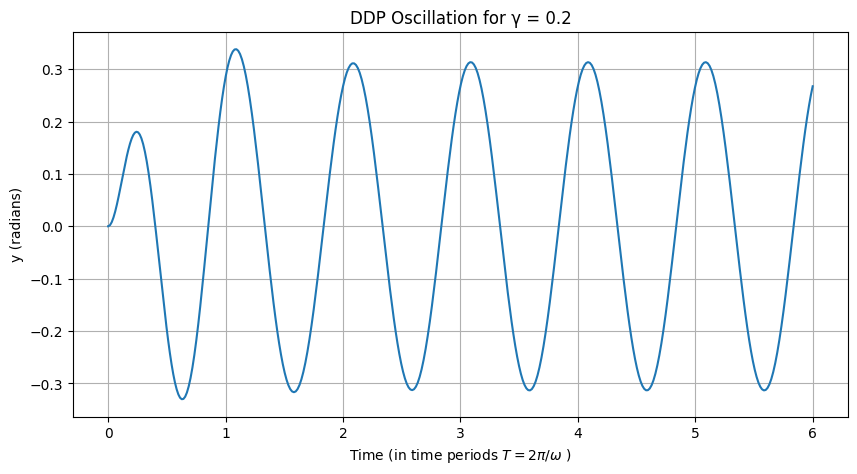

In [246]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Simulation for gamma = 0.2
gamma = 0.2
periods = 6  # Number of time periods to simulate

# Parameters
omega0 = 1.5
beta = 0.375
omega = 1.0
T = 2 * np.pi / omega  # Drive period

# DDP ODE function
def ddp(t, z, beta, omega0, gamma, omega):
    y, v = z
    return [v, -2 * beta * v - omega0**2 * np.sin(y) + gamma * omega0**2 * np.cos(omega * t)]

# Plot last 5 drive cycles
def simulate(gamma=gamma, periods=6, t_start=0, title_append='', plot=True, y_0=0.0, dy_0=0.0, t_eval=None, method='RK45'):
    # Parameters
    omega0 = 1.5
    beta = 0.375
    omega = 1.0
    T = 2 * np.pi / omega  # Drive period

    # Conduct the simulation
    t_span = [0, periods* T]  # Long simulation to reach steady state
    sol = solve_ivp(ddp, t_span, [y_0, dy_0], args=(beta, omega0, gamma, omega), method=method, rtol=1e-8, atol=1e-8, t_eval=t_eval)

    # plot the results:
    if plot:
        #fig, ax = plt.subplots()
        plt.figure(figsize=(10, 5))
        mask = sol.t/T > t_start
        plt.plot(sol.t[ mask]/T, sol.y[0, mask])
        plt.xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')
        plt.ylabel('y (radians)')
        plt.title(f'DDP Oscillation for γ = {gamma}' + title_append)
        plt.grid(True)
        #plt.show()
    return sol

simulate(gamma=gamma, periods=periods)

#### Interactive plot

The plot below can be used at any time for the rest of this section to play with and better understand the DDP system:

In [151]:
#%matplotlib widget
#%
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

interact(simulate, gamma=FloatSlider(min=0.9, max=1.105, step=0.001, value=0.9, readout_format='.3f'),   periods=IntSlider(min=1, max=50, step=1, value=6),
 t_start=IntSlider(min=0, max=40, step=1, value=0),
y_0=FloatSlider(min=0, max=np.pi*4, step=0.001, value=0),
dy_0=FloatSlider(min=-np.pi*4, max=np.pi*4, step=0.001, value=0)
         );

interactive(children=(FloatSlider(value=0.9, description='gamma', max=1.105, min=0.9, readout_format='.3f', st…

Just as important as changing the parameter to increase the pendulum driving force is to note the sensitivity to the initial conditions! For the rest of the develop towards the onset of Chaos we will closely follow the exposition by Taylor adapted to our python. Interested readers are referred to his textbook for deeper study.


### Investigate harmonic single period behaviour

First we observe that in the linear regime (when $\gamma << 1$), after the initial transients die out, the motion approaches a unique attractor. Then the pendulum oscillates with the same period as the driver.

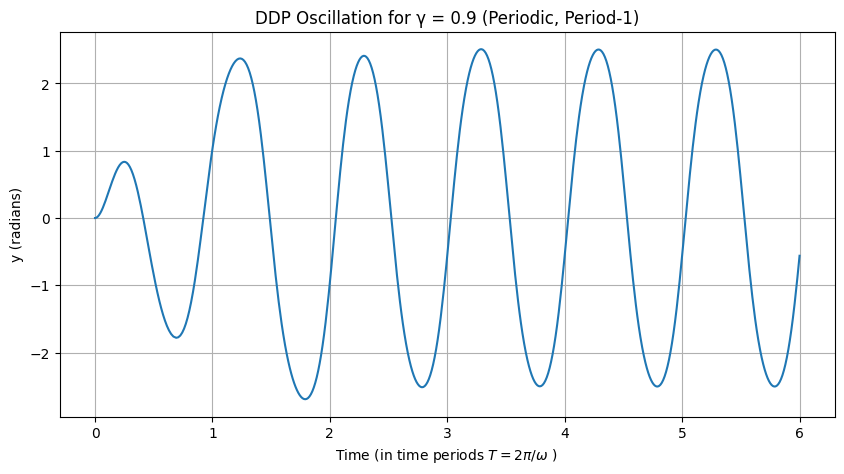

In [96]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Simulation for gamma = 0.9
gamma = 0.9
simulate(gamma=gamma, periods=6, title_append=' (Periodic, Period-1)')

At $\gamma = 1.06$, the system still stabilizes to a period-1 orbit after transients, but with larger amplitude due to increased drive. The motion remains periodic with the drive frequency, though the waveform begins to distort slightly from pure sinusoidality, hinting at emerging nonlinearity. This value is just below the first period-doubling bifurcation (around $\gamma \approx 1.066$), so the response is qualitatively similar to lower $\gamma$, but poised for bifurcation.

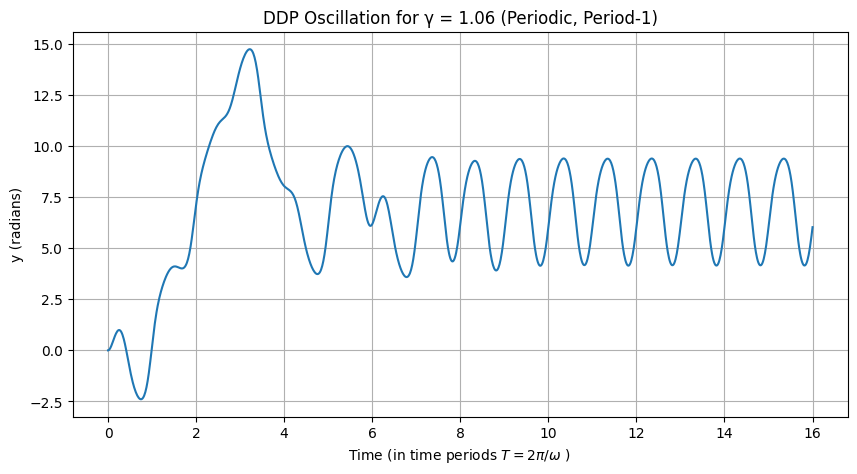

In [99]:
# Simulation for gamma = 1.06
gamma = 1.06
simulate(gamma=gamma, periods=16, title_append=' (Periodic, Period-1)')

### Increasing Drive: Emergence of Higher Periods
#### Period Two

At $\gamma = 1.073$, the system has passed the first period-doubling bifurcation and settles into a period-2 cycle after transients. This means the motion repeats every two drive periods ($2T$), with alternating high and low peaks, a hallmark of subharmonic response. The nonlinearity causes the system to "flip" between two states, and the waveform is no longer symmetric. This bifurcation occurs because the period-1 orbit becomes unstable, and a new stable attractor emerges.

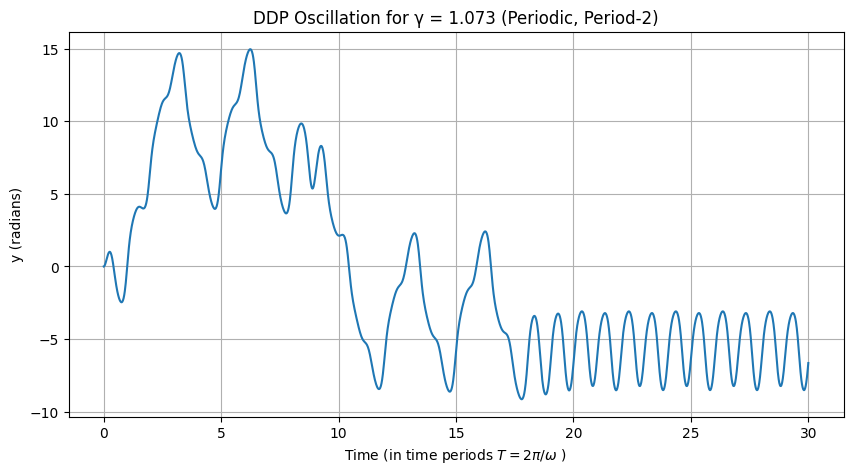

In [98]:
# Simulation for gamma = 1.073
gamma = 1.073
simulate(gamma=gamma, periods=30, title_append=' (Periodic, Period-2)')

In order to visualize the periodicity we can zoom in quickly by plotting the later time periods after the transients have died down>

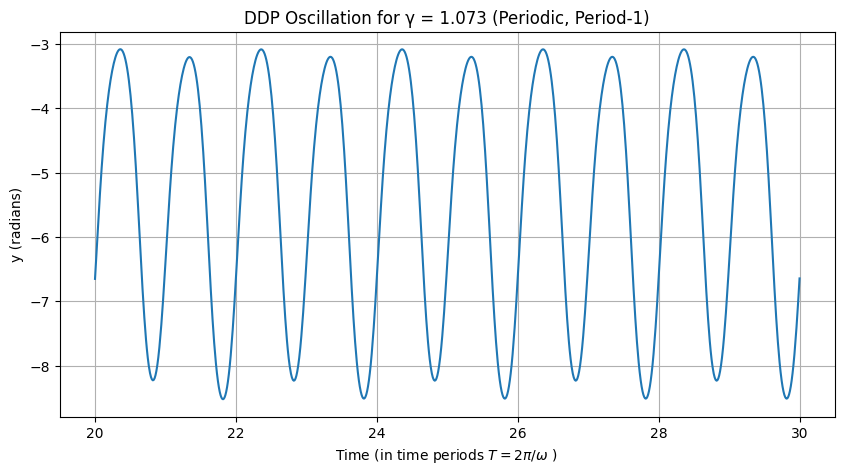

In [85]:
simulate(gamma=gamma, periods=30, t_start=20, title_append=' (Periodic, Period-2)')

#### Period Three

For $\gamma = 1.077$, with initial condition $y(0) = 0$, the system converges to a period-3 cycle, repeating every three drive periods ($3T$). This is an example of a periodic window within the doubling cascade, where chaos is interrupted by stable higher-period orbits. The three distinct peaks per cycle demonstrate the system's sensitivity to parameters; slight changes in initial conditions might lead to a coexisting period-2 attractor, highlighting multistability.

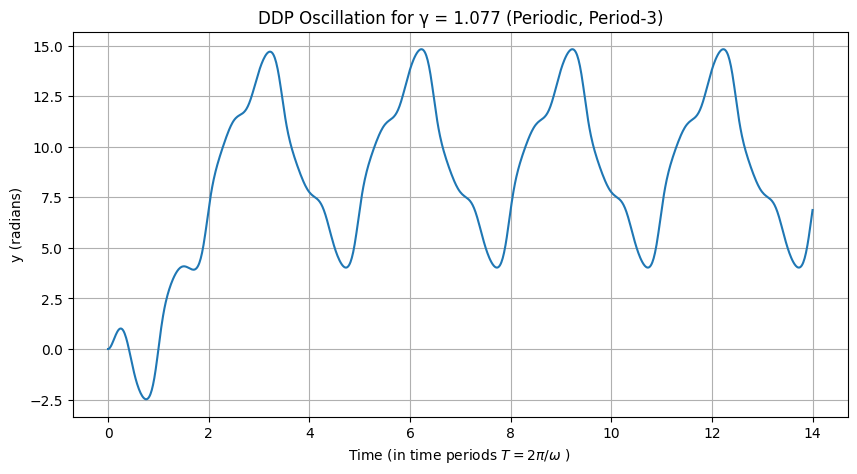

In [103]:
# Simulation for gamma = 1.077 (period-3 with y0=0)
gamma = 1.077
simulate(gamma=gamma, periods=14, t_start=0, title_append=' (Periodic, Period-3)')

The periodicity becomes more apparent if we compute the value of the function $y$ at different time periods lime $y(t=30 T), y(31 T), \dots$, in fact these values repeat almost to machine precision after only 30 cycles:


<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_125564/1200415710.py:26: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')


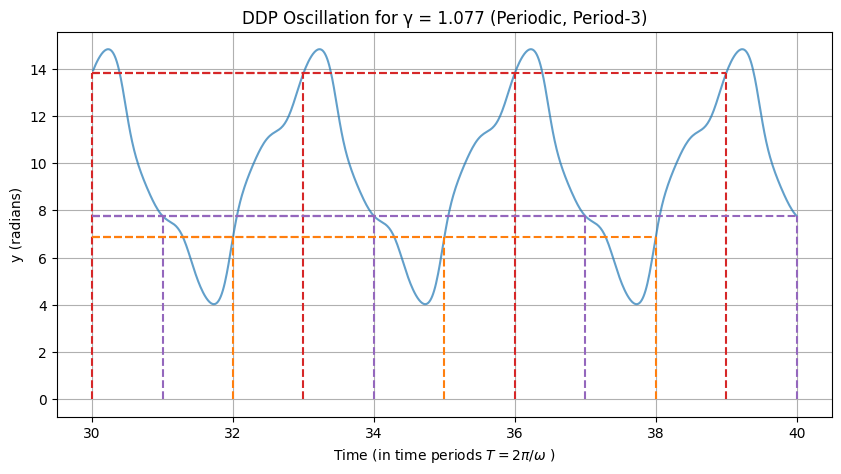

In [129]:
import itertools
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Simulation for gamma = 0.2
gamma = 1.077
periods = 40  # Number of time periods to simulate

# Plot last 5 drive cycles
def simulate_plot_drive_cycles(gamma=gamma, periods=6, t_start=0, title_append=' (Periodic, Period-3)', periodicity=3):
    # Parameters
    omega0 = 1.5
    beta = 0.375
    omega = 1.0
    T = 2 * np.pi / omega  # Drive period

    # Conduct the simulation
    t_span = [0, periods * T]  # Long simulation to reach steady state
    sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8, dense_output=True)

    # plot the results:
    plt.figure(figsize=(10, 5))
    mask = sol.t / T > t_start
    plt.plot(sol.t[mask] / T, sol.y[0, mask], alpha=0.7)
    plt.xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')
    plt.ylabel('y (radians)')
    plt.title(f'DDP Oscillation for γ = {gamma}' + title_append)
    plt.grid(True)

    # Add annotations at each integer time period
    #colors = plt.cm.viridis(np.linspace(0, 1, periods))  # Different colors for each period
    colors = itertools.cycle(['tab:red', 'tab:purple', 'tab:orange'])
    t_points = np.arange(t_start, periods + 1) * T
    for i, t in enumerate(t_points):
        x = t / T
        y = sol.sol(t)[0]
        color = next(colors)
        # Vertical dashed line between 0 and the function value
        plt.vlines(x, min(0, y), max(0, y), linestyles='dashed', colors=color, alpha=1)
        # Short horizontal dashed line to emphasize the value
        delta = 0.1
        #plt.hlines(y, x - delta, x + delta, linestyles='dashed', colors=color, alpha=0.7)
        plt.hlines(y, t_start, x , linestyles='dashed', colors=color, alpha=1)

simulate_plot_drive_cycles(gamma=gamma, periods=periods, t_start=30)

### Period-Doubling Cascade

The period-doubling cascade is a route to chaos where the system's period successively doubles (1 → 2 → 4 → 8 → ...) as $\gamma$ increases, with bifurcations occurring at closer intervals. Below are plots for specific $\gamma$ values, each showing the steady-state $y(t)$ over sufficient cycles to visualize the period. Annotations indicate the period.
To visualize the period-doubling cascade more compactly, we combine the time-series plots for the four drive strengths $\gamma = 1.06$ (period-1), $\gamma = 1.078$ (period-2), $\gamma = 1.081$ (period-4), and $\gamma = 1.086$ (period-8) into a single figure with subplots. Each subplot shows the steady-state angular displacement $y(t)$ over a sufficient number of drive cycles to highlight the period, with annotations indicating the observed period. The simulation parameters remain the same: $\omega_0 = 1.5$, $\beta = 0.375$, $\omega = 1.0$, initial conditions $y(0) = 0$, $\dot{y}(0) = 0$, and transients discarded by simulating over 500 drive periods.



<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_125564/643100317.py:28: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')
/tmp/ipykernel_125564/643100317.py:46: SyntaxWarning: invalid escape sequence '\p'
  axs[i].set_xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')


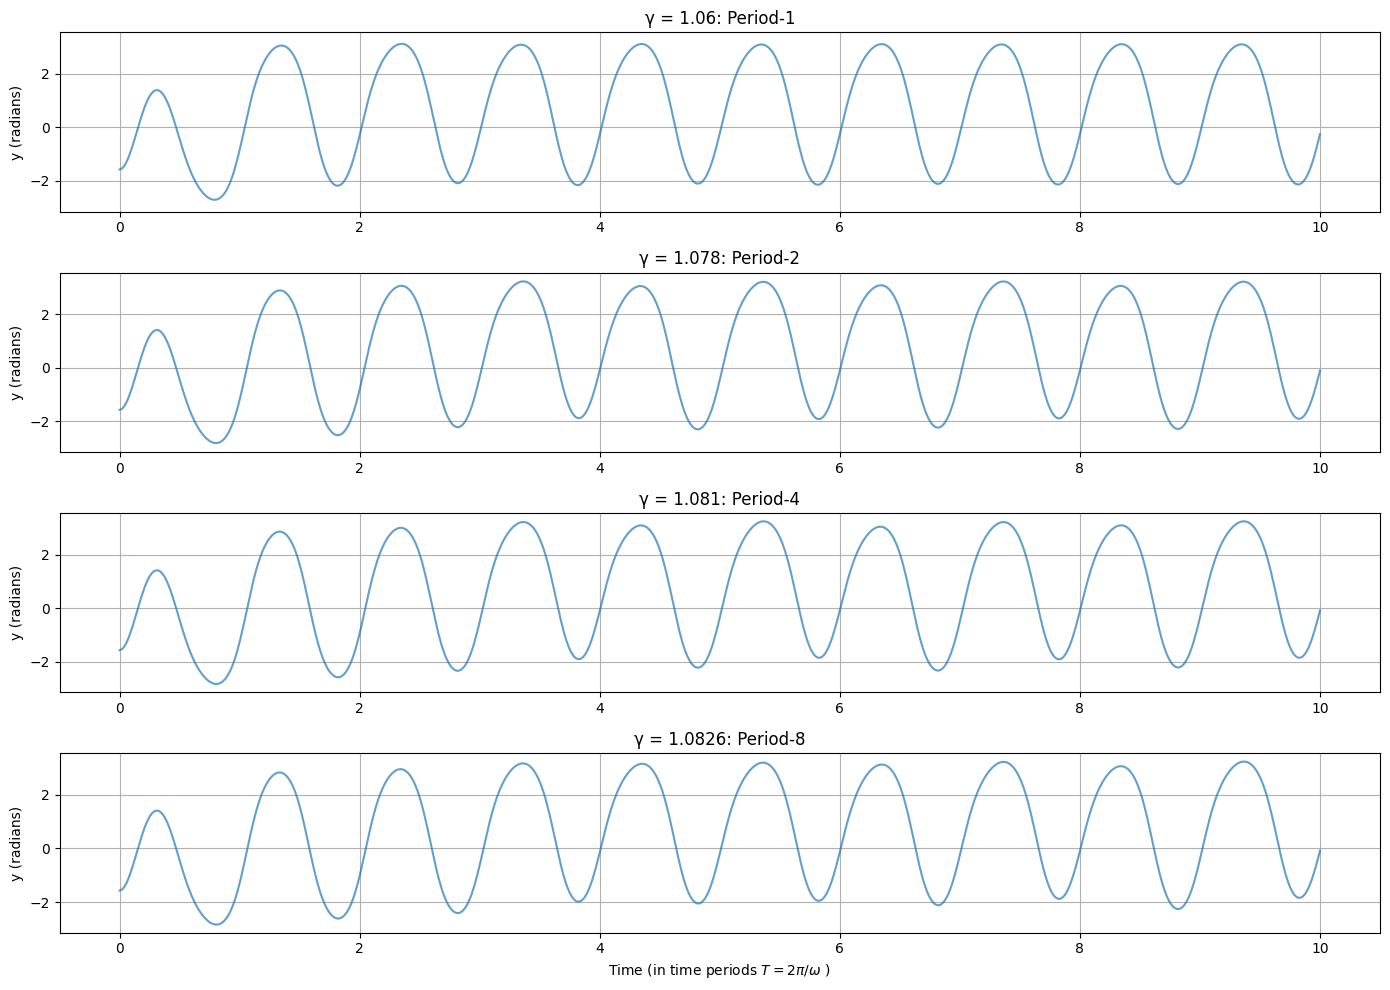

In [154]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


t_start = 0
gammas = [1.06, 1.078, 1.081, 1.0826]
periods = ['Period-1', 'Period-2', 'Period-4', 'Period-8']


# Set up figure with 4 subplots (2x2 grid)
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharey=True)
axs = axs.flatten()  # Flatten for easy indexing

for i, gamma in enumerate(gammas):

    t_span = [0, 40 * T]  # Long simulation for steady state
    #sol = solve_ivp(ddp, t_span, [0, 0], args=(beta, omega0, gamma, omega), method='RK45', rtol=1e-8, atol=1e-8
    sol = simulate(gamma=gamma, periods=10, t_start=t_start, title_append='', plot=False, y_0=-np.pi/2)
    # Plot last N cycles

    # plot the results:
    mask = sol.t / T > t_start
    axs[i].plot(sol.t[mask] / T, sol.y[0, mask], alpha=0.7)  # Shift time to start at 0 for clarity
    axs[i].set_ylabel('y (radians)')
    axs[i].set_title(f'γ = {gamma}: {periods[i]}')
    axs[i].grid(True)

axs[i].set_xlabel('Time (in time periods $T = 2 \pi / \omega$ ) ')
plt.tight_layout()
plt.show()

### Feigenbaum Number and Universality
The Feigenbaum number $\delta \approx 4.669201609...$ is a universal constant emerging in period-doubling cascades across many nonlinear systems. It describes the limiting ratio of successive bifurcation intervals: if $\gamma_n$ is the drive strength at the $n$-th doubling (e.g., period $2^n$), then $\delta = \lim_{n \to \infty} (\gamma_n - \gamma_{n-1}) / (\gamma_{n+1} - \gamma_n)$. For the DDP, approximate values are $\gamma_1 \approx 1.066$ (period-2), $\gamma_2 \approx 1.079$ (period-4), $\gamma_3 \approx 1.082$ (period-8), yielding ratios approaching $\delta$. This universality means the cascade structure is independent of specific system details, as long as the effective return map is unimodal (quadratic-like), like the logistic map. The bifurcation point (accumulation point) $\gamma_\infty \approx 1.0829$ marks the onset of chaos, where periods become infinite, and the attractor becomes strange, with sensitive dependence on initial conditions (positive Lyapunov exponent). Beyond this, chaos persists with periodic windows (e.g., period-3 at $\gamma \approx 1.077$), demonstrating self-similarity and fractal structure.

### Bifurcation Diagram of the DDP

The bifurcation diagram visualizes the cascade by plotting stroboscopic samples of $y$ (at times $t_k = k T$, after transients) versus $\gamma$. For each $\gamma$, simulate, discard the first 300 cycles, then collect $y(t_k)$ for 200 subsequent cycles. This reveals the doubling: single point (period-1), two (period-2), etc., densifying towards chaos.

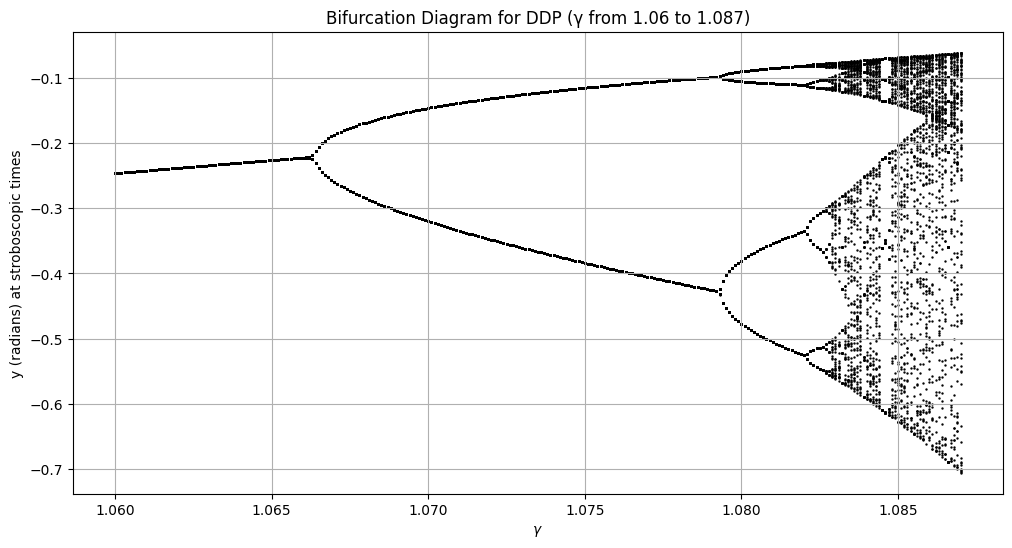

In [188]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Gamma range
gamma_min = 1.06
gamma_max = 1.087
gamma_step = 0.0001
gammas = np.arange(gamma_min, gamma_max + gamma_step / 2, gamma_step)  # Inclusive

# Prepare lists for plotting
gamma_list = []
y_list = []

# Loop over each gamma
for gamma in gammas:
    t_max = 600 * T
    sample_times = np.arange(501, 601) * T
    sol = simulate(gamma=gamma, periods=600, t_start=t_start, title_append='', plot=False, y_0=-np.pi/2, t_eval=sample_times)
    gamma_list.append(gamma)
    y_list.append(sol.y[0])

# Plot the bifurcation diagram
plt.figure(figsize=(12, 6))
gamma_expanded = np.repeat(np.array(gamma_list)[:, np.newaxis], 100, axis=1)
plt.scatter(gamma_expanded, y_list, s=0.5, color='black')  # Small points for density
plt.xlabel(r'$\gamma$')
plt.ylabel('y (radians) at stroboscopic times')
plt.title('Bifurcation Diagram for DDP (γ from 1.06 to 1.087)')
plt.grid(True)
plt.show()

The Bifurcation diagram tells us the following:

1. The period doubling happens in line with our expectation of the Feigenbaum number at parameters $\gamma_1 = 1.0663, \gamma_2 = 1.0793, \gamma_3 = 1.0821, \gamma_4 = 1.0827$:

$$  \frac{\gamma_2 - \gamma_1}{\gamma_3 - \gamma_2} \approx 4.6$$

2. The DDP system is ordered and displays periodicity up and until about a critical point at around $\gamma_c = 1.0829$ where becomes mostly chaotic.
3. At the onset of chaos we see a fractal like expansion called a strange attractor.
4. However, periodicity does _resume_ later at around $\gamma = 1.0845$ which has a period 6.

In [199]:
gamma_array = np.array(gamma_list)
indices = np.argwhere(np.isclose(gamma_array, 1.0663))
indices[0]

array([63])

In [204]:
np.min(y_list[int(indices[0])])

/tmp/ipykernel_125564/221263923.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.min(y_list[int(indices[0])])


np.float64(-0.2251687314438392)

In [196]:
np.array(gamma_list)

array([1.06  , 1.0601, 1.0602, 1.0603, 1.0604, 1.0605, 1.0606, 1.0607,
       1.0608, 1.0609, 1.061 , 1.0611, 1.0612, 1.0613, 1.0614, 1.0615,
       1.0616, 1.0617, 1.0618, 1.0619, 1.062 , 1.0621, 1.0622, 1.0623,
       1.0624, 1.0625, 1.0626, 1.0627, 1.0628, 1.0629, 1.063 , 1.0631,
       1.0632, 1.0633, 1.0634, 1.0635, 1.0636, 1.0637, 1.0638, 1.0639,
       1.064 , 1.0641, 1.0642, 1.0643, 1.0644, 1.0645, 1.0646, 1.0647,
       1.0648, 1.0649, 1.065 , 1.0651, 1.0652, 1.0653, 1.0654, 1.0655,
       1.0656, 1.0657, 1.0658, 1.0659, 1.066 , 1.0661, 1.0662, 1.0663,
       1.0664, 1.0665, 1.0666, 1.0667, 1.0668, 1.0669, 1.067 , 1.0671,
       1.0672, 1.0673, 1.0674, 1.0675, 1.0676, 1.0677, 1.0678, 1.0679,
       1.068 , 1.0681, 1.0682, 1.0683, 1.0684, 1.0685, 1.0686, 1.0687,
       1.0688, 1.0689, 1.069 , 1.0691, 1.0692, 1.0693, 1.0694, 1.0695,
       1.0696, 1.0697, 1.0698, 1.0699, 1.07  , 1.0701, 1.0702, 1.0703,
       1.0704, 1.0705, 1.0706, 1.0707, 1.0708, 1.0709, 1.071 , 1.0711,
      

In [193]:
# First let's compute Feigenbaum's delta:
gamma_1 = 1.0663  #
gamma_2 = 1.0793  #
gamma_3 = 1.0821  #
gamma_4 = 1.0827  #
delta_FG = (gamma_2 - gamma_1) / (gamma_3 - gamma_2)
delta_FG

4.642857142856882

Next, let's add the doubling windows to our plot:

/tmp/ipykernel_125564/1154195506.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yi_max = float(np.max(y_list[int(indices[0])]))


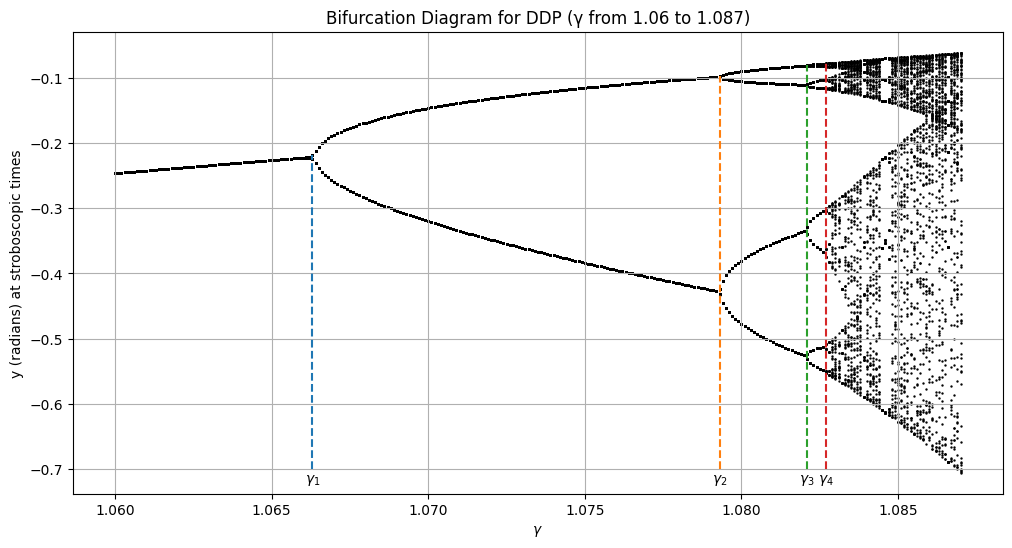

In [219]:
plt.figure(figsize=(12, 6))
gamma_expanded = np.repeat(np.array(gamma_list)[:, np.newaxis], 100, axis=1)
plt.scatter(gamma_expanded, y_list, s=0.5, color='black')  # Small points for density
plt.xlabel(r'$\gamma$')
plt.ylabel('y (radians) at stroboscopic times')
plt.title('Bifurcation Diagram for DDP (γ from 1.06 to 1.087)')
plt.grid(True)

# Plot new annotations:
gamma_array = np.array(gamma_list)
gamma_c = 1.0829  # Parameter at the onset of chaos
doubling = [gamma_1, gamma_2, gamma_3, gamma_4]  # gamma values from cell above,
#  label dictionary
gamma_label = [r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$']

for i, gamma_i in enumerate(doubling):
    # First we find out there the gamma is in our array of parameters:
    indices = np.argwhere(np.isclose(gamma_array, gamma_i))
    # Now find the maximum value in the set:
    yi_max = float(np.max(y_list[int(indices[0])]))
    # Plot as dashed line:
    plt.plot([gamma_i, gamma_i], [-0.7, yi_max] , '--')

    label = gamma_label[i]
    plt.text(gamma_i, -0.705, label, ha='center', va='top', fontsize=10, color='k')

plt.show()

### Formal definitions

At this point it is important to formally define the terms we have used loosely up until now such as periodicity and "fractal-like" strange attractor sets. By abstracting these concepts we can develop a useful computation tool later. First the definition for periodicity we used in the linear, **periodic** domains:

> **Definition:** **Periodicity:** Systems display periodicity when they dispay a periodic trajectory $\mathbf{y}(t)$ with period $T$: A solution to a dynamical system $\frac{d y}{dt} = \mathbf{f}(\mathbf{y}, t)$ (or its discrete counterpart) where $\mathbf{y}(t + T) = \mathbf{y}(t)$ for all $t \in \mathbb{R}$, with $T > 0$ being the minimal positive value (fundamental period) satisfying this condition, forming a closed orbit in phase space $\mathcal{Y}$. In driven systems (e.g., the DDP), the period may be an integer multiple of the driving period, leading to period-$n$ responses.

Next, we used the term **strange attractor** as roughly corresponding to the set of points we saw plotted in the chaotic regimes, formally

> **Definition:** **Strange attractor**: A compact, invariant set $\mathcal{A} \subset \mathcal{Y}$ in the phase space of a dynamical system $\mathbf{f}(\mathbf{y})$, characterized by: (i) attracting nearby trajectories asymptotically, (ii) exhibiting sensitive dependence on initial conditions (chaotic dynamics), and (iii) possessing a fractal structure with non-integer (Hausdorff) dimension, leading to bounded but unpredictable long-term behavior.

Note that not every **attractor* is a strange attractor. Well ordered sets can also fit in a general definition and not every chaotic system's chaotic regime attactor set displays fractal like behavior like the strange attractor.

> **Definition:** **Attractor:** A compact, invariant set $\mathcal{A} \subset \mathcal{Y}$ in the phase space of a dynamical system $\frac{d y}{dt} = \mathbf{f}(\mathbf{y}, t)$ (or its discrete counterpart), to which trajectories starting from a neighborhood (basin of attraction) converge asymptotically as $t \to \infty$. Attractors can manifest as fixed points, limit cycles, tori, or more complex structures (e.g., strange attractors in chaotic systems), and are computationally identified via long-term simulations or Lyapunov stability analysis.


We used the terms phase space, fixed points etc. before defining it to ease the expositional flow from the more computational aspects of the study of non-linearity towards more formal and abstract aspects. In the next section we will develop it separately from the concept of chaos.

## Phase Space Portraits: From 1D to 2D and Beyond

In nonlinear dynamics, as discussed in Steven Strogatz's Nonlinear Dynamics and Chaos, phase space is a fundamental concept for visualizing the behavior of dynamical systems. Phase space is the space in which all possible states of a system are represented, with each state corresponding to a unique point. For a system described by differential equations, the coordinates are typically the variables and their derivatives (e.g., position and velocity). Trajectories in phase space show how the system evolves over time, never crossing due to determinism. Fixed points are special states where the system remains at rest, and their stability determines nearby behavior. We'll start with 1D systems, move to 2D, explain fixed points in detail, and then illustrate a "cascade" leading to complex behavior using a surface-like visualization in a discrete system, analogous to failure in predictability (e.g., period-doubling cascade to chaos, which can model cascading instabilities in engineering contexts like orbital perturbations or structural resonances).

### 1D Phase Space: The Phase Line

In one-dimensional systems, the dynamics are governed by a single equation $\dot{x} = f(x)$, where $x$ is the state variable and $\dot{x} = dx/dt$. The phase space is simply the real line (x-axis), called the phase line. Flow is indicated by arrows: rightward where $f(x) > 0$ (increasing $x$) and leftward where $f(x) < 0$ (decreasing $x$). Fixed points occur where $f(x^*) = 0$, acting as attractors or repellers.
A classic example is the logistic equation for population growth: $\dot{x} = r x (1 - x)$, where $r > 0$ is the growth rate and $x \geq 0$ (normalized population). Fixed points are at $x^* = 0$ (unstable for $r > 0$) and $x^* = 1$ (stable). For small perturbations, trajectories converge to or diverge from these points.
To visualize, we plot the phase line with arrows and fixed points. Here's Python code using Matplotlib to plot $f(x)$ and the phase line for $r = 2$:

<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_125564/4077886147.py:18: SyntaxWarning: invalid escape sequence '\d'
  ax[0].set_ylabel('$\dot{x} = f(x)$')


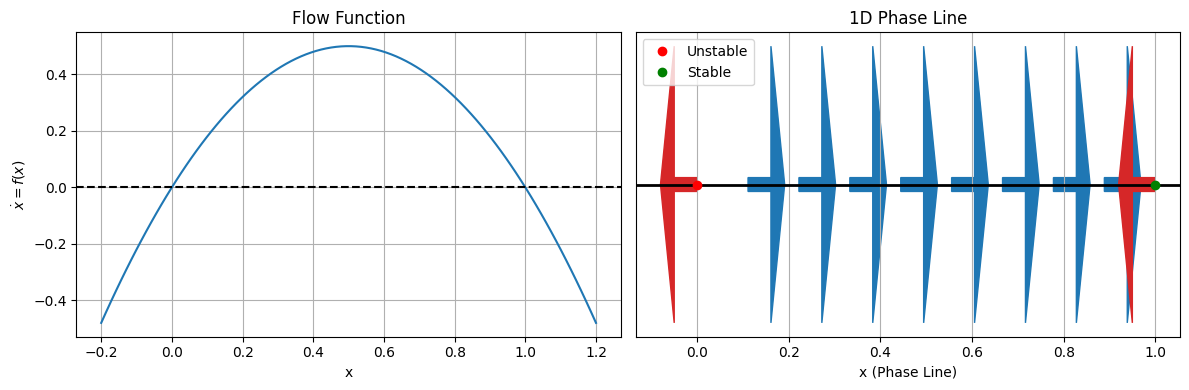

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the flow function
def f(x, r=2):
    return r * x * (1 - x)

# Grid for x
x = np.linspace(-0.2, 1.2, 100)
fx = f(x)

# Plot f(x) vs x
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, fx)
ax[0].axhline(0, color='k', linestyle='--')
ax[0].set_xlabel('x')
ax[0].set_ylabel('$\dot{x} = f(x)$')
ax[0].set_title('Flow Function')
ax[0].grid(True)

# Phase line: arrows where f>0 right, f<0 left
ax[1].axhline(0, color='k', linewidth=2)
for xi in np.linspace(0, 1, 10):
    if f(xi) > 0:
        ax[1].arrow(xi, 0, 0.05, 0, head_width=0.02, color='tab:blue')
    else:
        ax[1].arrow(xi, 0, -0.05, 0, head_width=0.02, color='tab:red')

# Fixed points
ax[1].plot(0, 0, 'ro', label='Unstable')
ax[1].plot(1, 0, 'go', label='Stable')
ax[1].set_xlabel('x (Phase Line)')
ax[1].set_yticks([])
ax[1].set_title('1D Phase Line')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

This shows convergence to $x=1$ from the right and divergence from $x=0$. In engineering, this models resource-limited growth, e.g., satellite population in an orbit slot.
2D Phase Space: The Phase Plane
For two-dimensional systems, $\dot{x} = f(x, y)$, $\dot{y} = g(x, y)$, phase space is the (x, y)-plane, often position and velocity. Trajectories are curves traced by solutions over time. Fixed points $(x^*, y^*)$ satisfy $f(x^*, y^*) = g(x^*, y^*) = 0$. Stability is assessed by linearizing around the fixed point: the Jacobian matrix $J = \begin{pmatrix} \partial f/\partial x & \partial f/\partial y \\ \partial g/\partial x & \partial g/\partial y \end{pmatrix}$ at $(x^*, y^*)$. Eigenvalues determine type: real negative (stable node), real positive (unstable node), opposite signs (saddle), complex with negative real part (stable spiral), etc.
A simple example is the damped harmonic oscillator: $\dot{x} = y$, $\dot{y} = -x - 0.5 y$ (linear, with damping). The origin is a stable spiral. For nonlinear, consider the undriven damped pendulum: $\dot{\theta} = v$, $\dot{v} = -\sin(\theta) - 0.5 v$. Fixed points at $(\theta, v) = (k\pi, 0)$, with $k$ even stable (downward), odd unstable (upward).
Use matplotlib.streamplot for vector field and scipy.integrate.solve_ivp for trajectories.

In [1]:
from scipy.integrate import solve_ivp


if 0:
    # Damped harmonic oscillator
    def harmonic(t, z):
        x, y = z
        return [y, -x - 0.5 * y]
    # Grid for streamplot
    X, Y = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-3, 3, 20))
    U = Y
    V = -X - 0.5 * Y

    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, U, V, color='b', density=1)

    # Trajectories from initial conditions
    ics = [[2, 0], [0, 2], [-2, 0]]
    for ic in ics:
        sol = solve_ivp(harmonic, [0, 20], ic, dense_output=True)
        t = np.linspace(0, 20, 200)
        z = sol.sol(t)
        plt.plot(z[0], z[1], 'r-')

    plt.plot(0, 0, 'go', label='Stable Spiral')
    plt.xlabel('x')
    plt.ylabel('y (velocity)')
    plt.title('2D Phase Plane: Damped Harmonic Oscillator')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Nonlinear pendulum
    def pendulum(t, z):
        theta, v = z
        return [v, -np.sin(theta) - 0.5 * v]


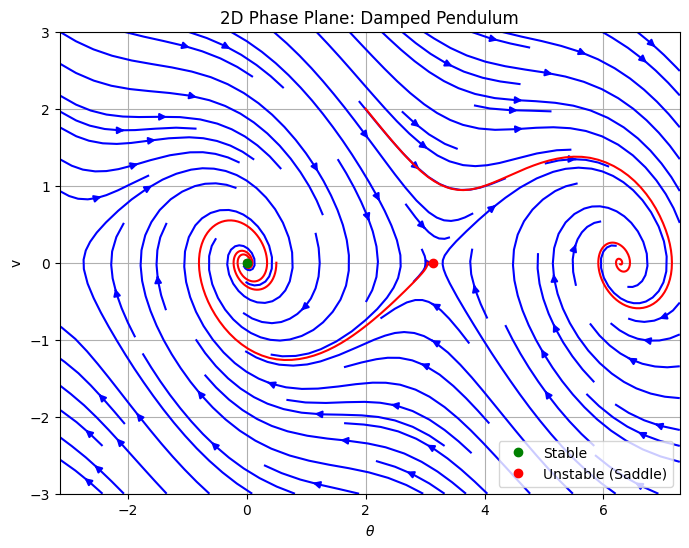

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Nonlinear pendulum
def pendulum(t, z):
    theta, v = z
    return [v, -np.sin(theta) - 0.5 * v]

# Corrected grid variables to avoid overwriting
theta_grid, v_grid = np.meshgrid(np.linspace(-np.pi, 2*np.pi+1, 20), np.linspace(-3, 3, 20))
U = v_grid  # dtheta/dt = v
V = -np.sin(theta_grid) - 0.5 * v_grid  # dv/dt

plt.figure(figsize=(8, 6))
plt.streamplot(theta_grid, v_grid, U, V, color='b', density=1)

# Trajectories
ics = [[0.5, 0], [np.pi - 0.1, 0], [2, 2]]
for ic in ics:
    sol = solve_ivp(pendulum, [0, 20], ic, dense_output=True)
    t = np.linspace(0, 20, 200)
    z = sol.sol(t)
    plt.plot(z[0], z[1], 'r-')

plt.plot(0, 0, 'go', label='Stable')
plt.plot(np.pi, 0, 'ro', label='Unstable (Saddle)')
plt.xlabel('$\\theta$')
plt.ylabel('v')
plt.title('2D Phase Plane: Damped Pendulum')
plt.legend()
plt.grid(True)
plt.show()

In would be useful for you to play around with the starting point to build intution about how the trajectories will always w

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider

# Nonlinear pendulum ODE
def pendulum(t, z):
    theta, v = z
    return [v, -np.sin(theta) - 0.5 * v]

# Function to generate the interactive plot
def plot_phase_portrait(theta0=0.5, v0=0.0):
    # Grid for vector field
    theta_grid, v_grid = np.meshgrid(np.linspace(-np.pi-1, np.pi+1, 20), np.linspace(-3, 3, 20))
    U = v_grid  # dtheta/dt = v
    V = -np.sin(theta_grid) - 0.5 * v_grid  # dv/dt

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.streamplot(theta_grid, v_grid, U, V, color='b', density=1)

    # Simulate trajectory from initial condition
    sol = solve_ivp(pendulum, [0, 20], [theta0, v0], dense_output=True)
    t = np.linspace(0, 20, 200)
    z = sol.sol(t)
    ax.plot(z[0], z[1], 'r-', label=f'Trajectory from ({theta0:.2f}, {v0:.2f})')

    # Fixed points
    ax.plot(0, 0, 'go', label='Stable')
    ax.plot(np.pi, 0, 'ro', label='Unstable (Saddle)')

    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('v')
    ax.set_title('Interactive Phase Plane: Damped Pendulum')
    ax.legend()
    ax.grid(True)
    plt.show()

# Create interactive sliders
interact(plot_phase_portrait,
         theta0=FloatSlider(min=-np.pi, max=np.pi, step=0.1, value=0.5, description='Initial θ:'),
         v0=FloatSlider(min=-3, max=3, step=0.1, value=0.0, description='Initial v:'));

interactive(children=(FloatSlider(value=0.5, description='Initial θ:', max=3.141592653589793, min=-3.141592653…

### Fixed Points: Analysis and Stability

These portraits reveal spirals into stable points and saddles repelling trajectories. In space engineering, this models attitude dynamics or vibrations.
Fixed Points: Analysis and Stability
Fixed points are equilibria where the system velocity is zero. In nD, solve $\mathbf{\dot{z}} = \mathbf{0}$. Stability: if all nearby trajectories approach (attractor), diverge (repeller), or mixed (saddle). For linear systems, eigenvalues of J classify: trace $\tau = \lambda_1 + \lambda_2 < 0$ for stability, determinant $\Delta > 0$. Nonlinear systems use Hartman-Grobman theorem for local linear approximation, but global behavior requires numerical portraits.
In the pendulum, at (0,0): $J = \begin{pmatrix} 0 & 1 \\ -1 & -0.5 \end{pmatrix}$, eigenvalues from $\lambda^2 + 0.5\lambda + 1 = 0$, complex with negative real part (stable spiral). At (\pi,0): $J = \begin{pmatrix} 0 & 1 \\ 1 & -0.5 \end{pmatrix}$, eigenvalues real opposite signs (saddle).

#### Demonstrating Cascade Failure: Period-Doubling Cascade as a Surface
To demonstrate "cascade failure"—interpreted here as the period-doubling cascade leading to chaotic "failure" of periodic predictability (common in Strogatz's chaos chapters)—we use the logistic map $x_{n+1} = r x_n (1 - x_n)$. As $r$ increases, stable periods double (1→2→4...), accumulating at $r_\infty \approx 3.57$, beyond which chaos ensues, modeling cascading instability.
The standard bifurcation diagram is 2D, but to visualize as a "surface," we plot a 3D view: $r$ (parameter), $n$ (iteration), $x_n$ (state), showing how dynamics "cascade" across iterations and parameters. This surface-like plot highlights the doubling and onset of dense, unpredictable filling (failure).

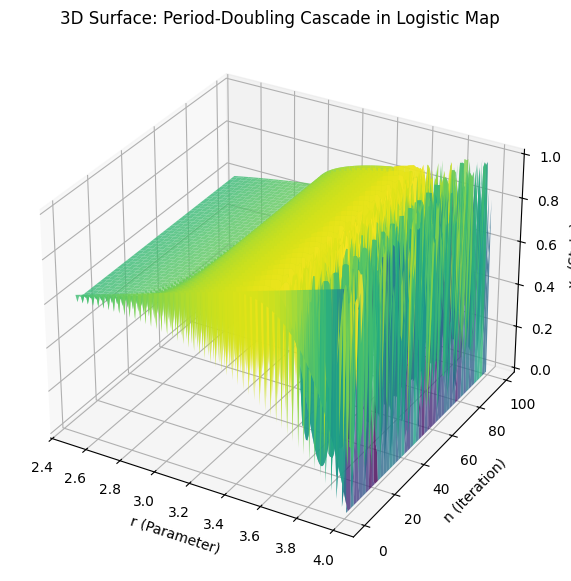

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Logistic map function
def logistic(r, x):
    return r * x * (1 - x)

# Generate data for 3D plot
r_vals = np.linspace(2.5, 4.0, 200)
n_iters = 100  # Iterations (depth)
x0 = 0.5
X, N = np.meshgrid(r_vals, np.arange(n_iters))  # r and n grids
Z = np.zeros_like(X)  # x_n

for i, r in enumerate(r_vals):
    x = x0
    for j in range(n_iters):
        x = logistic(r, x)
        Z[j, i] = x  # Note: no transient discard for full cascade view

# 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, N, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('r (Parameter)')
ax.set_ylabel('n (Iteration)')
ax.set_zlabel('$x_n$ (State)')
ax.set_title('3D Surface: Period-Doubling Cascade in Logistic Map')
plt.show()

## Critical Points in Dynamical Systems

In the context of this course, we define a critical point (also known as a fixed point or equilibrium point) rigorously using the provided nomenclature as follows:
Consider a dynamical system described by the vector-valued mapping $\mathbf{f}: \mathbb{R}^m \to \mathbb{R}^m$, which governs the evolution of the state vector $\mathbf{y}(t) \in \mathbb{R}^m$ according to the ordinary differential equation (ODE) $\dot{\mathbf{y}} = \mathbf{f}(\mathbf{y})$, assuming an autonomous system for simplicity (time-independent, no explicit $t$ dependence). A critical point is a state $\mathbf{y}^* \in \mathbb{R}^m$ such that $\mathbf{f}(\mathbf{y}^*) = \mathbf{0}$, where $\mathbf{0}$ is the zero vector. This implies that if the system is initialized at $\mathbf{y}(0) = \mathbf{y}^*$, then $\mathbf{y}(t) = \mathbf{y}^*$ for all $t \geq 0$, representing a static equilibrium within the dynamic set $\mathcal{Y}$.
To classify the local behavior near $\mathbf{y}^*$, we linearize the system by considering the Jacobian matrix $\mathbf{A} = \left. \frac{\partial \mathbf{f}}{\partial \mathbf{y}} \right|_{\mathbf{y}^*}$, which is a coefficient matrix evaluated at the critical point. The eigenvalues $\lambda_i$ (possibly complex) of $\mathbf{A}$ determine the type and stability of the critical point. Stability is assessed as follows:

Asymptotically stable (attractor): All trajectories in a neighborhood converge to $\mathbf{y}^*$ as $t \to \infty$ (all $\Re(\lambda_i) < 0$).
Unstable (repeller): Trajectories diverge from $\mathbf{y}^*$ (at least one $\Re(\lambda_i) > 0$).
Marginally stable: Trajectories neither converge nor diverge (e.g., pure imaginary eigenvalues).

For higher-dimensional systems ($m \geq 3$), global behavior may involve manifolds or strange attractors, but local classification relies on the linear approximation (Hartman-Grobman theorem). Parameters $\mathbf{p}$ may shift $\mathbf{y}^*$ or change types via bifurcations. Below, we focus on 2D systems ($m=2$) as outlined by Strogatz, providing computational examples with phase portraits generated via Python. These illustrate the most important types: stable node, unstable node, saddle, stable spiral, unstable spiral, and center.
Plot Examples of Critical Point Types
We use the linear system $\dot{\mathbf{y}} = \mathbf{A} \mathbf{y}$, where $\mathbf{y} = [y_1, y_2]^T$, to prototype each type by choosing $\mathbf{A}$ with appropriate eigenvalues. Trajectories are solved numerically with scipy.integrate.solve_ivp, and the vector field is visualized with matplotlib.streamplot. All examples assume $\mathbf{y}^* = \mathbf{0}$ without loss of generality.
1. Stable Node
Eigenvalues: Real, negative, distinct (e.g., $\lambda_1 = -2$, $\lambda_2 = -1$). Trajectories approach the critical point along eigenvectors, decelerating.

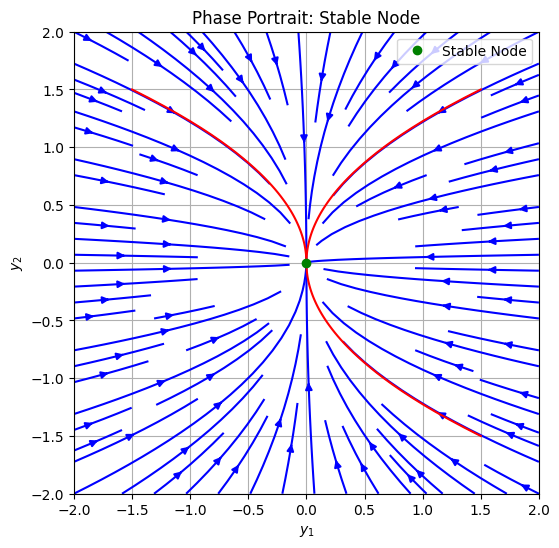

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System: stable node
def stable_node(t, y):
    A = np.array([[-2, 0], [0, -1]])  # Diagonal for simplicity
    return A @ y

# Grid for vector field
y1, y2 = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
u = -2 * y1
v = -1 * y2

plt.figure(figsize=(6, 6))
plt.streamplot(y1, y2, u, v, color='b', density=1)

# Trajectories
ics = [[1.5, 1.5], [-1.5, 1.5], [1.5, -1.5]]
for ic in ics:
    sol = solve_ivp(stable_node, [0, 5], ic, dense_output=True)
    t = np.linspace(0, 5, 100)
    z = sol.sol(t)
    plt.plot(z[0], z[1], 'r-')

plt.plot(0, 0, 'go', label='Stable Node')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Phase Portrait: Stable Node')
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

2. Unstable Node
Eigenvalues: Real, positive, distinct (e.g., $\lambda_1 = 2$, $\lambda_2 = 1$). Trajectories diverge from the critical point.

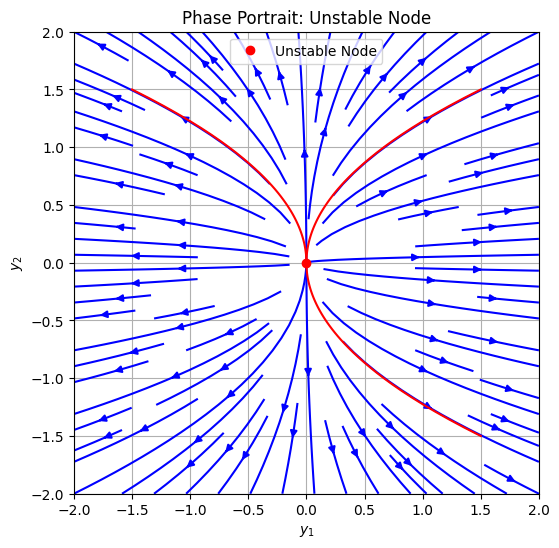

In [5]:
# System: unstable node
def unstable_node(t, y):
    A = np.array([[2, 0], [0, 1]])
    return A @ y

# Vector field
u = 2 * y1
v = 1 * y2

plt.figure(figsize=(6, 6))
plt.streamplot(y1, y2, u, v, color='b', density=1)

# Trajectories (integrate backward for inbound)
for ic in ics:
    sol = solve_ivp(unstable_node, [0, -5], ic, dense_output=True)  # Backward time
    t = np.linspace(0, -5, 100)
    z = sol.sol(t)
    plt.plot(z[0], z[1], 'r-')

plt.plot(0, 0, 'ro', label='Unstable Node')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Phase Portrait: Unstable Node')
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

3. Saddle Point
Eigenvalues: Real, opposite signs (e.g., $\lambda_1 = 1$, $\lambda_2 = -1$). Stable manifold attracts, unstable repels.

In [ ]:
3. Saddle Point
Eigenvalues: Real, opposite signs (e.g., $\lambda_1 = 1$, $\lambda_2 = -1$). Stable manifold attracts, unstable repels.

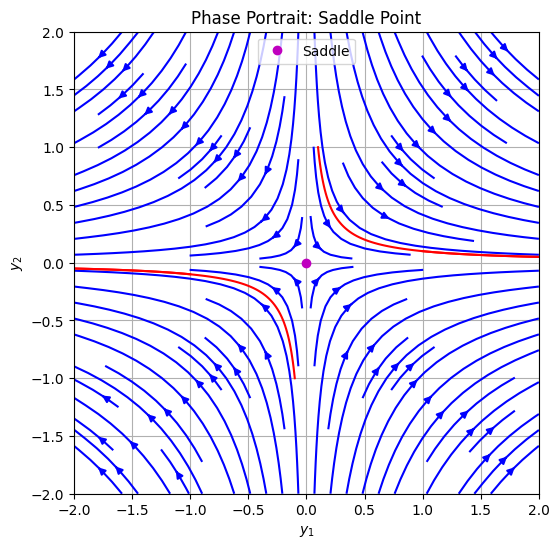

In [6]:
# System: saddle
def saddle(t, y):
    A = np.array([[1, 0], [0, -1]])
    return A @ y

# Vector field
u = 1 * y1
v = -1 * y2

plt.figure(figsize=(6, 6))
plt.streamplot(y1, y2, u, v, color='b', density=1)

# Trajectories
ics_saddle = [[0.1, 1], [1, 0.1], [-0.1, -1], [-1, -0.1]]
for ic in ics_saddle:
    sol = solve_ivp(saddle, [0, 5], ic, dense_output=True)
    t = np.linspace(0, 5, 100)
    z = sol.sol(t)
    plt.plot(z[0], z[1], 'r-')

plt.plot(0, 0, 'mo', label='Saddle')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Phase Portrait: Saddle Point')
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

4. Stable Spiral (Focus)
Eigenvalues: Complex with negative real part (e.g., $\lambda = -0.5 \pm i$). Trajectories spiral inward.

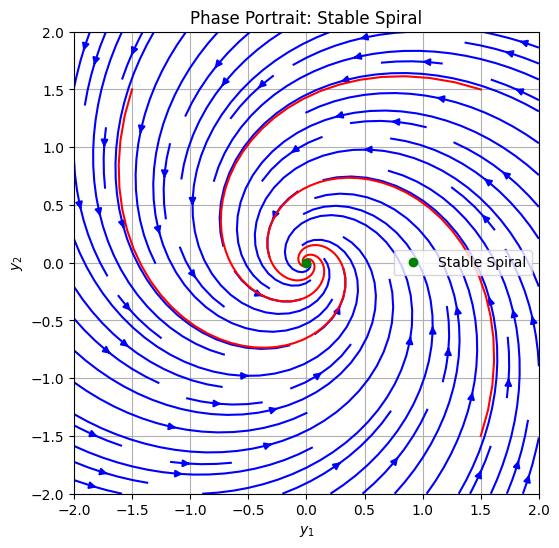

In [7]:
# System: stable spiral
def stable_spiral(t, y):
    A = np.array([[-0.5, -1], [1, -0.5]])
    return A @ y

# Vector field
u = -0.5 * y1 - 1 * y2
v = 1 * y1 - 0.5 * y2

plt.figure(figsize=(6, 6))
plt.streamplot(y1, y2, u, v, color='b', density=1)

# Trajectories
for ic in ics:
    sol = solve_ivp(stable_spiral, [0, 20], ic, dense_output=True)
    t = np.linspace(0, 20, 200)
    z = sol.sol(t)
    plt.plot(z[0], z[1], 'r-')

plt.plot(0, 0, 'go', label='Stable Spiral')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Phase Portrait: Stable Spiral')
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

5. Unstable Spiral (Focus)
Eigenvalues: Complex with positive real part (e.g., $\lambda = 0.5 \pm i$). Trajectories spiral outward

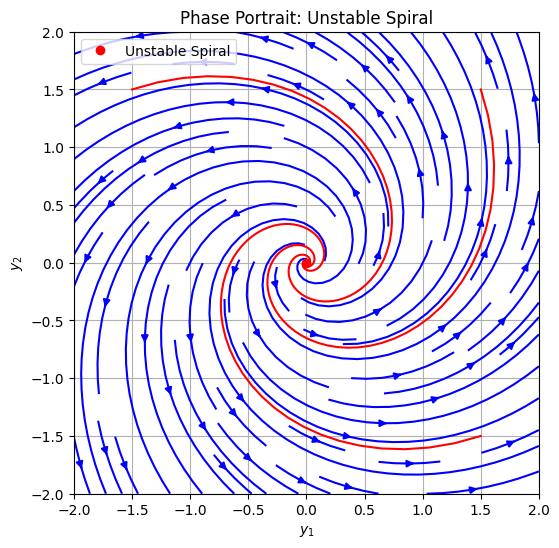

In [8]:
# System: unstable spiral
def unstable_spiral(t, y):
    A = np.array([[0.5, -1], [1, 0.5]])
    return A @ y

# Vector field
u = 0.5 * y1 - 1 * y2
v = 1 * y1 + 0.5 * y2

plt.figure(figsize=(6, 6))
plt.streamplot(y1, y2, u, v, color='b', density=1)

# Trajectories (backward time)
for ic in ics:
    sol = solve_ivp(unstable_spiral, [0, -20], ic, dense_output=True)
    t = np.linspace(0, -20, 200)
    z = sol.sol(t)
    plt.plot(z[0], z[1], 'r-')

plt.plot(0, 0, 'ro', label='Unstable Spiral')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Phase Portrait: Unstable Spiral')
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

6. Center
Eigenvalues: Pure imaginary (e.g., $\lambda = \pm i$). Closed orbits; marginally stable (conservative system).

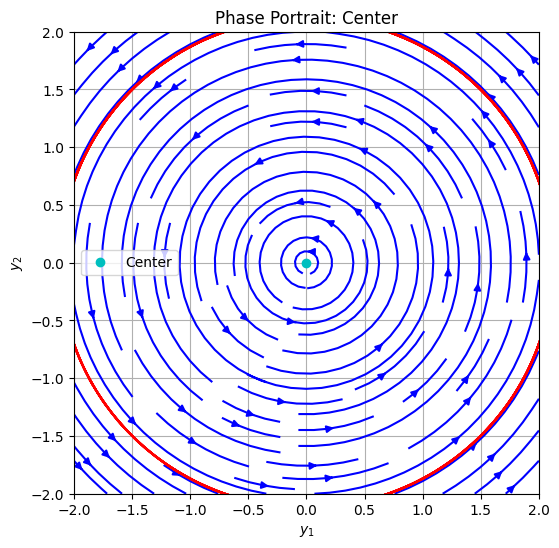

In [9]:
# System: center
def center(t, y):
    A = np.array([[0, -1], [1, 0]])
    return A @ y

# Vector field
u = -1 * y2
v = 1 * y1

plt.figure(figsize=(6, 6))
plt.streamplot(y1, y2, u, v, color='b', density=1)

# Trajectories
for ic in ics:
    sol = solve_ivp(center, [0, 20], ic, dense_output=True)
    t = np.linspace(0, 20, 200)
    z = sol.sol(t)
    plt.plot(z[0], z[1], 'r-')

plt.plot(0, 0, 'co', label='Center')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Phase Portrait: Center')
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

For the remainder of this chapter, we will look into more domain specific and historical systems which can be optionally read.


## (Optional) Non-Linearity and Chaos: Extending to Continuous Systems and Orbital Mechanics

Building on our earlier discussion of state-space descriptions for dynamical systems, where we represent the evolution of a system through trajectories in phase space (e.g., position and velocity coordinates), we now delve deeper into tools for analyzing non-linear behavior and chaos in continuous-time systems. Discrete maps like the logistic map provide insight into bifurcation and chaos, but many engineering problems—especially in space engineering—involve continuous differential equations. Here, we introduce the Poincaré map as a powerful reduction technique to study such systems, pioneered by Henri Poincaré in the late 19th century.

### Poincaré's Contributions and the Poincaré Map

Henri Poincaré, often regarded as the father of chaos theory, made seminal contributions while studying the three-body problem in celestial mechanics. In 1887, as part of King Oscar II's prize competition, Poincaré analyzed the stability of orbits in a system of three gravitational bodies. He discovered that even in seemingly simple deterministic systems, solutions could exhibit extreme sensitivity to initial conditions—non-periodic, unpredictable behavior that we now call chaos. This shattered the Laplacian dream of a fully predictable universe and laid the groundwork for modern dynamical systems theory.
To analyze periodic orbits, stability, and chaos in high-dimensional continuous systems, Poincaré introduced the Poincaré map (or section). The idea is to reduce the continuous flow in phase space to a discrete map by intersecting trajectories with a lower-dimensional surface (a "section"). For a system with state vector $\mathbf{y}(t) \in \mathbb{R}^n$, choose a hypersurface $\Sigma$ (e.g., where one coordinate is zero). Each time the trajectory crosses $\Sigma$ in a specified direction, record the intersection point. This yields a discrete sequence of points, transforming the ODE into a map similar to the logistic map.

Regular behavior: Points form closed curves (invariant tori) or fixed points/limit cycles.
Chaotic behavior: Points densely fill regions, showing ergodicity and sensitivity (e.g., nearby trajectories diverge exponentially, quantified by Lyapunov exponents).

Poincaré sections reveal the structure of phase space: islands of regularity surrounded by chaotic seas, as per the KAM theorem (Kolmogorov-Arnold-Moser), which states that weak perturbations preserve some quasi-periodic orbits.
In space engineering, Poincaré's insights are crucial for understanding orbital stability, mission design (e.g., low-energy transfers), and long-term predictability in multi-body systems like satellites near Lagrange points.

#### Example from Orbital Mechanics: Chaos in the Circular Restricted Three-Body Problem (CR3BP)
A prototypical example from astronomy and orbital mechanics is the Circular Restricted Three-Body Problem (CR3BP), modeling a small body (e.g., spacecraft) under the gravity of two larger bodies (e.g., Earth and Moon) orbiting circularly around their center of mass. The two primaries have masses $m_1$ (larger) and $m_2$ (smaller), with mass ratio $\mu = m_2 / (m_1 + m_2)$. The third body has negligible mass and does not affect the primaries.
In the rotating (synodic) frame, where the primaries are fixed on the x-axis at $(- \mu, 0)$ and $(1 - \mu, 0)$, the equations of motion are derived from an effective potential including centrifugal forces. The state space is 4D: positions $(x, y)$ and velocities $(\dot{x}, \dot{y})$ (z=0 for planar case).
The non-dimensional ODEs are:

$$\ddot{x} = 2\dot{y} + x - \frac{(1-\mu)(x + \mu)}{r_1^3} - \frac{\mu(x - 1 + \mu)}{r_2^3}$$

$$\ddot{y} = -2\dot{x} + y - \frac{(1-\mu)y}{r_1^3} - \frac{\mu y}{r_2^3}$$

where $r_1 = \sqrt{(x + \mu)^2 + y^2}$ and $r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}$.

This system conserves the Jacobi integral (energy-like quantity):

$$C = x^2 + y^2 + 2\left(\frac{1-\mu}{r_1} + \frac{\mu}{r_2}\right) - (\dot{x}^2 + \dot{y}^2)$$

For certain energy levels $C$, orbits near Lagrange points can be quasi-periodic, but perturbations lead to chaos—relevant for asteroid dynamics, comet trajectories, or satellite station-keeping.

##### Simulation and Demonstration
To demonstrate, we'll simulate trajectories using scipy.integrate.solve_ivp and compute a Poincaré section on the plane $y = 0$ (with $\dot{y} > 0$ to ensure consistent crossing direction). We'll plot points in the $(x, \dot{x})$ subspace. For $\mu = 0.3$ (a generic value showing clear chaos), we'll integrate multiple initial conditions at different energies to show regular vs. chaotic regions.
This reveals:

Regular orbits: Closed loops in the section (quasi-periodic).
Chaotic orbits: Scattered points filling areas.

<>:51: SyntaxWarning: invalid escape sequence '\d'
<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:51: SyntaxWarning: invalid escape sequence '\d'
<>:52: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_285716/1168412570.py:51: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$')
/tmp/ipykernel_285716/1168412570.py:52: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Poincaré Section (y=0, $\dot{y}>0$) for CR3BP, $\mu=0.3$')


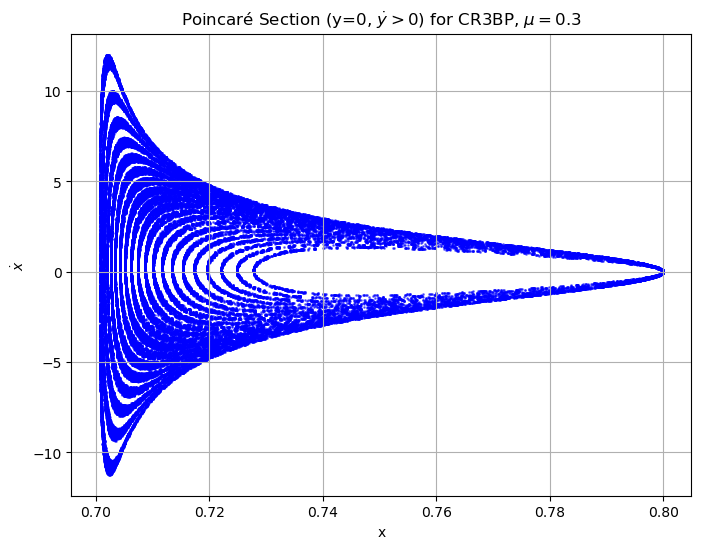

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def cr3bp(t, state, mu):
    x, y, vx, vy = state
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)

    ax = 2*vy + x - (1-mu)*(x + mu)/r1**3 - mu*(x - 1 + mu)/r2**3
    ay = -2*vx + y - (1-mu)*y/r1**3 - mu*y/r2**3

    return [vx, vy, ax, ay]

def jacobi_constant(state, mu):
    x, y, vx, vy = state
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return x**2 + y**2 + 2*((1-mu)/r1 + mu/r2) - (vx**2 + vy**2)

# Parameters
mu = 0.3  # Mass ratio (e.g., for a binary asteroid system)
t_span = (0, 1000)  # Integration time
num_orbits = 20  # Number of initial conditions to sample

# Poincaré section collector
poincare_x = []
poincare_vx = []

# Sample initial conditions around a nominal point, varying energy via vy
x0 = 0.8
y0 = 0.0
vx0 = 0.0
for i in range(num_orbits):
    vy0 = 0.1 + i * 0.05  # Vary initial vy to get different energies
    init_state = [x0, y0, vx0, vy0]

    sol = solve_ivp(cr3bp, t_span, init_state, args=(mu,), method='RK45', rtol=1e-8, atol=1e-8)

    # Find crossings where y ≈ 0 and vy > 0
    crossings = np.where(np.diff(np.sign(sol.y[1])) > 0)[0]  # Where y changes from - to +
    for idx in crossings:
        if abs(sol.y[1, idx]) < 1e-3:  # Close enough to y=0
            poincare_x.append(sol.y[0, idx])
            poincare_vx.append(sol.y[2, idx])  # vx = dot{x}

# Plot Poincaré section
plt.figure(figsize=(8, 6))
plt.scatter(poincare_x, poincare_vx, s=1, c='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('$\dot{x}$')
plt.title('Poincaré Section (y=0, $\dot{y}>0$) for CR3BP, $\mu=0.3$')
plt.grid(True)
plt.show()

#### Interpretation and Exercises

Run the code: Observe how some clusters form closed curves (regular orbits), while others scatter chaotically.
Modify parameters: Change $\mu$ to 0.012 (Earth-Moon) and re-run. Compute the Jacobi constant for each orbit—how does it relate to bounded vs. escaping trajectories?
Extension: Add perturbations (e.g., small random noise to initial conditions) and quantify sensitivity using Lyapunov exponents (hint: compute divergence of nearby trajectories over time).
Space engineering relevance: In missions like Artemis or JUICE, chaotic regions enable "ballistic capture" for fuel-efficient orbits, but require robust control (tie-in to later units on MPC/RL).

For deeper study: See "Chaos in Dynamical Systems" by Ott or "Poincaré's Legacies" for orbital applications. Experiment with the code to explore!

## (Optional) Periodicity and Onset of Chaos in the Logistic Map

Following the same development we had before for the DDP, we re

The logistic map is defined as:

$$ x_{n+1} = r x_n (1 - x_n) $$

where $ x_n $ is the state at iteration $ n $ (typically $ 0 < x_n < 1 $), and $ r $ is a parameter controlling the system's behavior ( $ 0 < r \leq 4 $). For space engineering contexts, this can analogize discrete-time models in control systems or resource allocation under constraints.
Fixed Points and Stability

To find fixed points (equilibria where $ x_{n+1} = x_n = x^* $):

$$ x^* = r x^* (1 - x^*) $$

Solving gives:

$ x^* = 0 $ or $ x^* = 1 - \frac{1}{r} $ (for $ r > 1 $)

Stability is determined by the derivative at the fixed point:

$$ f'(x) = r (1 - 2x) $$

For $ x^* = 0 $: stable when $ |r| < 1 $.
For $ x^* = 1 - \frac{1}{r} $: stable when $ |f'(x^*)| = |2 - r| < 1 $, i.e., $ 1 < r < 3 $.

For $ r < 1 $, the system converges to 0 (extinction). For $ 1 < r < 3 $, it converges to the nonzero fixed point.

### Period Doubling and Bifurcations
As $ r $ increases beyond 3, the fixed point becomes unstable, and a period-2 cycle emerges (bifurcation). The period-2 points satisfy $ x_{n+2} = x_n $, but not period-1.
The period-2 cycle is stable for $ 3 < r < r_2 \approx 3.45 $. Further increases lead to period-4 ($ r \approx 3.45 $ to $ 3.54 $), period-8, and so on, with bifurcations accumulating at the Feigenbaum point $ r_\infty \approx 3.56995 $, beyond which chaos ensues.
The ratios of bifurcation intervals approach the Feigenbaum constant:
$ \delta \approx 4.6692 $
where the interval lengths $ \Delta r_k = r_{k+1} - r_k $ satisfy $ \frac{\Delta r_k}{\Delta r_{k+1}} \to \delta $.
Onset of Chaos
For $ r > r_\infty $, the behavior becomes chaotic: aperiodic, sensitive to initial conditions, and dense in some interval. However, there are "periodic windows" embedded in the chaotic regime (e.g., period-3 at $ r \approx 3.83 $).
To illustrate, we can use Python to simulate iterations and plot the bifurcation diagram.

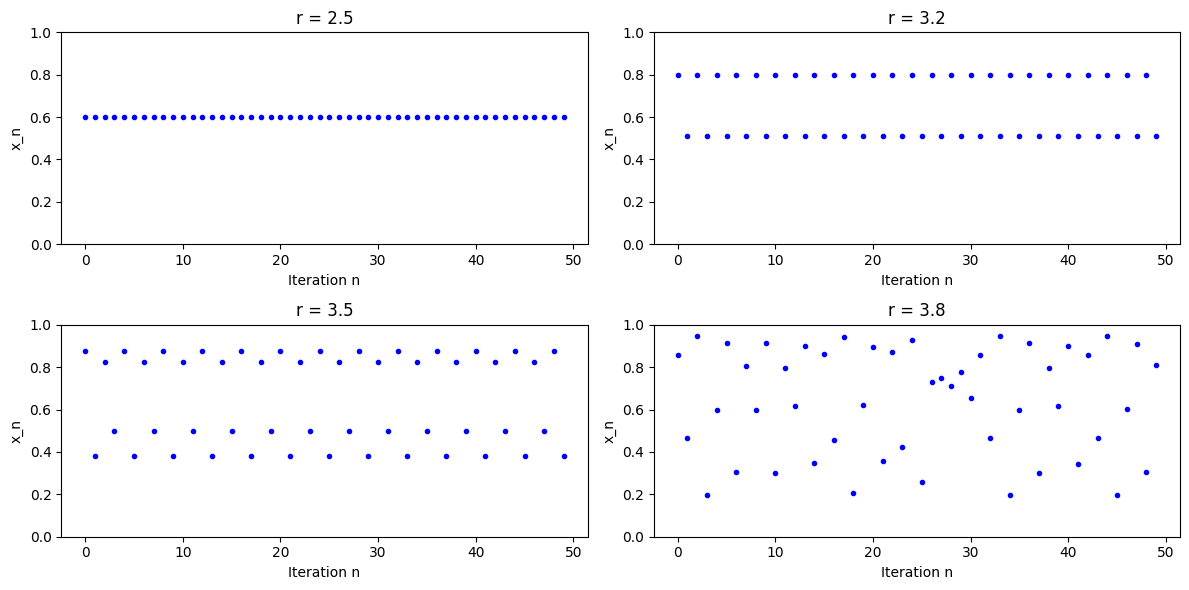

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function for logistic map iteration
def logistic_map(r, x0, n_iter=1000, n_transient=100):
    x = x0
    for _ in range(n_transient):  # Discard transient
        x = r * x * (1 - x)
    values = []
    for _ in range(n_iter):
        x = r * x * (1 - x)
        values.append(x)
    return values

# Example: Periodicity for different r
r_values = [2.5, 3.2, 3.5, 3.8]  # Fixed point, period-2, period-4, chaotic
x0 = 0.5
n_iter = 50

plt.figure(figsize=(12, 6))
for i, r in enumerate(r_values):
    plt.subplot(2, 2, i+1)
    iterations = logistic_map(r, x0, n_iter, 100)
    plt.plot(range(n_iter), iterations, 'b.')
    plt.title(f'r = {r}')
    plt.xlabel('Iteration n')
    plt.ylabel('x_n')
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Bifurcation Diagram of logistic Map

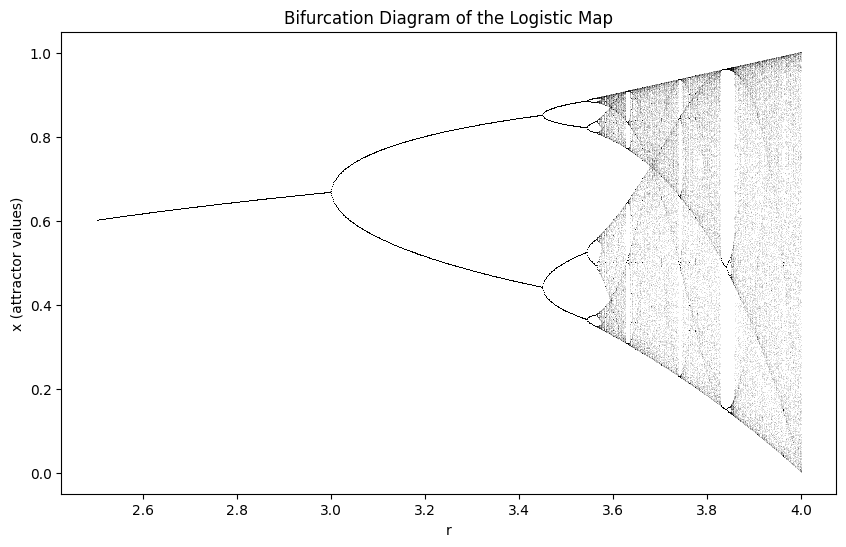

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Bifurcation diagram
r_min, r_max = 2.5, 4.0
n_r = 1000
n_iter = 1000
n_transient = 200
x0 = 0.00001  # Small initial value

r_vals = np.linspace(r_min, r_max, n_r)
x_vals = []
r_plot = []  # Initialize as empty list

for r in r_vals:
    x = logistic_map(r, x0, n_iter, n_transient)
    x_vals.extend(x[-200:])  # Last 200 points to show attractors
    r_plot.extend(np.repeat(r, 200))  # Accumulate corresponding r values

plt.figure(figsize=(10, 6))
plt.plot(r_plot, x_vals, 'k,', alpha=0.1)  # Dense plot
plt.xlabel('r')
plt.ylabel('x (attractor values)')
plt.title('Bifurcation Diagram of the Logistic Map')
plt.show()

In [65]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from scipy.integrate import solve_ivp

class OrbitMaintenanceEnv(gym.Env):
    """
    Custom Gym environment for orbit station-keeping.
    State: [altitude deviation, velocity deviation]
    Action: delta-v impulse (thrust) in m/s, bounded [-0.1, 0.1]
    """
    def __init__(self):
        super(OrbitMaintenanceEnv, self).__init__()

        # Constants
        self.mu = 3.986e14  # Earth's gravitational parameter (m^3/s^2)
        self.R_earth = 6.371e6  # Earth radius (m)
        self.initial_altitude = 400000  # 400 km
        self.initial_r = self.R_earth + self.initial_altitude
        self.initial_v = np.sqrt(self.mu / self.initial_r)  # Circular orbit velocity

        # Drag parameters (simplified)
        self.drag_coeff = 2.2  # Drag coefficient
        self.area_mass_ratio = 0.01  # m^2/kg
        self.atm_density_scale = 1e-12  # kg/m^3 at 400 km (approx)

        # Bounds for normalization
        self.altitude_bounds = np.array([-10000, 10000])  # +/- 10 km deviation
        self.velocity_bounds = np.array([-10, 10])  # +/- 10 m/s

        # Gym spaces
        self.observation_space = spaces.Box(low=-1, high=1, shape=(2,), dtype=np.float32)
        self.action_space = spaces.Box(low=-0.1, high=0.1, shape=(1,), dtype=np.float32)  # delta-v in m/s

        # Time step (approx one orbit period / 10)
        self.dt = 600  # seconds (~10 min, full orbit ~90 min)

        self.reset()

    def reset(self, seed=None, options=None):
        """Reset to initial state with small random perturbation."""
        if seed is not None:
            np.random.seed(seed)
        self.current_r = self.initial_r + np.random.uniform(-1000, 1000)
        self.current_v = np.sqrt(self.mu / self.current_r) + np.random.uniform(-1, 1)
        self.time = 0
        return self._get_obs(), {}

    def step(self, action):
        """Apply action (delta-v), simulate drag, propagate dynamics."""
        delta_v = action[0]

        # Apply impulse (along velocity direction)
        self.current_v += delta_v

        # Simulate dynamics over dt (ODE for position/velocity with drag)
        def dynamics(t, y):
            r, v = y
            accel_grav = -self.mu / r**2
            density = self.atm_density_scale * np.exp(-(r - self.R_earth - 400000) / 100000)  # Exponential atm
            accel_drag = -0.5 * self.drag_coeff * self.area_mass_ratio * density * v**2 * (v / np.abs(v)) if v != 0 else 0
            return [v, accel_grav + accel_drag]

        sol = solve_ivp(dynamics, [0, self.dt], [self.current_r, self.current_v], method='RK45', rtol=1e-6)
        self.current_r = sol.y[0, -1]
        self.current_v = sol.y[1, -1]
        self.time += self.dt

        # Compute altitude deviation
        altitude = self.current_r - self.R_earth
        delta_alt = altitude - self.initial_altitude

        # Reward: -deviation - fuel cost (encourage maintenance with minimal thrust)
        reward = -np.abs(delta_alt) / 1000 - np.abs(delta_v) * 10  # Scale for balance

        # Done if out of bounds
        terminated = np.abs(delta_alt) > 10000
        truncated = self.time > 1000 * self.dt  # Max episode length

        return self._get_obs(), reward, terminated, truncated, {}

    def _get_obs(self):
        """Normalized observation."""
        delta_alt = (self.current_r - self.R_earth) - self.initial_altitude
        delta_v = self.current_v - np.sqrt(self.mu / self.current_r)
        obs = np.array([delta_alt / self.altitude_bounds[1], delta_v / self.velocity_bounds[1]])
        return obs.astype(np.float32)

# Create environment
env = make_vec_env(OrbitMaintenanceEnv, n_envs=1)

# Train PPO agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the agent
obs, _ = env.reset()
for _ in range(100):
    action, _states = model.predict(obs)
    obs, reward, done, _, info = env.step(action)
    if done:
        print("Episode done.")
        break

# For visualization (optional, add matplotlib plots for trajectory)

Using cuda device


/home/endres/anaconda3/envs/comp_eng/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1         |
|    ep_rew_mean     | -3.47e+03 |
| time/              |           |
|    fps             | 928       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1             |
|    ep_rew_mean          | -3.47e+03     |
| time/                   |               |
|    fps                  | 790           |
|    iterations           | 2             |
|    time_elapsed         | 5             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00012481358 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.42         |
|    explained_variance   | -0.003

ValueError: not enough values to unpack (expected 2, got 1)

In [66]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from scipy.integrate import solve_ivp

class OrbitMaintenanceEnv(gym.Env):
    """
    Custom Gym environment for orbit station-keeping.
    State: [altitude deviation, velocity deviation]
    Action: delta-v impulse (thrust) in m/s, bounded [-0.1, 0.1]
    """
    def __init__(self):
        super(OrbitMaintenanceEnv, self).__init__()

        # Constants
        self.mu = 3.986e14  # Earth's gravitational parameter (m^3/s^2)
        self.R_earth = 6.371e6  # Earth radius (m)
        self.initial_altitude = 400000  # 400 km
        self.initial_r = self.R_earth + self.initial_altitude
        self.initial_v = np.sqrt(self.mu / self.initial_r)  # Circular orbit velocity

        # Drag parameters (simplified)
        self.drag_coeff = 2.2  # Drag coefficient
        self.area_mass_ratio = 0.01  # m^2/kg
        self.atm_density_scale = 1e-12  # kg/m^3 at 400 km (approx)

        # Bounds for normalization
        self.altitude_bounds = np.array([-10000, 10000])  # +/- 10 km deviation
        self.velocity_bounds = np.array([-10, 10])  # +/- 10 m/s

        # Gym spaces
        self.observation_space = spaces.Box(low=-1, high=1, shape=(2,), dtype=np.float32)
        self.action_space = spaces.Box(low=-0.1, high=0.1, shape=(1,), dtype=np.float32)  # delta-v in m/s

        # Time step (approx one orbit period / 10)
        self.dt = 600  # seconds (~10 min, full orbit ~90 min)

        self.reset()

    def reset(self, seed=None, options=None):
        """Reset to initial state with small random perturbation."""
        if seed is not None:
            np.random.seed(seed)
        self.current_r = self.initial_r + np.random.uniform(-1000, 1000)
        self.current_v = np.sqrt(self.mu / self.current_r) + np.random.uniform(-1, 1)
        self.time = 0
        return self._get_obs(), {}

    def step(self, action):
        """Apply action (delta-v), simulate drag, propagate dynamics."""
        delta_v = action[0]

        # Apply impulse (along velocity direction)
        self.current_v += delta_v

        # Simulate dynamics over dt (ODE for position/velocity with drag)
        def dynamics(t, y):
            r, v = y
            accel_grav = -self.mu / r**2
            density = self.atm_density_scale * np.exp(-(r - self.R_earth - 400000) / 100000)  # Exponential atm
            accel_drag = -0.5 * self.drag_coeff * self.area_mass_ratio * density * v**2 * (v / np.abs(v)) if v != 0 else 0
            return [v, accel_grav + accel_drag]

        sol = solve_ivp(dynamics, [0, self.dt], [self.current_r, self.current_v], method='RK45', rtol=1e-6)
        self.current_r = sol.y[0, -1]
        self.current_v = sol.y[1, -1]
        self.time += self.dt

        # Compute altitude deviation
        altitude = self.current_r - self.R_earth
        delta_alt = altitude - self.initial_altitude

        # Reward: -deviation - fuel cost (encourage maintenance with minimal thrust)
        reward = -np.abs(delta_alt) / 1000 - np.abs(delta_v) * 10  # Scale for balance

        # Done if out of bounds
        terminated = np.abs(delta_alt) > 10000
        truncated = self.time > 1000 * self.dt  # Max episode length

        return self._get_obs(), reward, terminated, truncated, {}

    def _get_obs(self):
        """Normalized observation."""
        delta_alt = (self.current_r - self.R_earth) - self.initial_altitude
        delta_v = self.current_v - np.sqrt(self.mu / self.current_r)
        obs = np.array([delta_alt / self.altitude_bounds[1], delta_v / self.velocity_bounds[1]])
        return obs.astype(np.float32)

# Create environment (use single env instead of vectorized for simplicity)
env = OrbitMaintenanceEnv()

# Train PPO agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the agent
obs, _ = env.reset()
for _ in range(100):
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        print("Episode done.")
        break

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1         |
|    ep_rew_mean     | -3.47e+03 |
| time/              |           |
|    fps             | 898       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1            |
|    ep_rew_mean          | -3.47e+03    |
| time/                   |              |
|    fps                  | 771          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 8.557222e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2        

In [67]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

class OrbitMaintenanceEnv(gym.Env):
    """
    Custom Gym environment for orbit station-keeping.
    State: [altitude deviation, velocity deviation]
    Action: delta-v impulse (thrust) in m/s, bounded [-0.1, 0.1]
    """
    def __init__(self):
        super(OrbitMaintenanceEnv, self).__init__()

        # Constants
        self.mu = 3.986e14  # Earth's gravitational parameter (m^3/s^2)
        self.R_earth = 6.371e6  # Earth radius (m)
        self.initial_altitude = 400000  # 400 km
        self.initial_r = self.R_earth + self.initial_altitude
        self.initial_v = np.sqrt(self.mu / self.initial_r)  # Circular orbit velocity

        # Drag parameters (simplified)
        self.drag_coeff = 2.2  # Drag coefficient
        self.area_mass_ratio = 0.01  # m^2/kg
        self.atm_density_scale = 1e-12  # kg/m^3 at 400 km (approx)

        # Bounds for normalization
        self.altitude_bounds = np.array([-10000, 10000])  # +/- 10 km deviation
        self.velocity_bounds = np.array([-10, 10])  # +/- 10 m/s

        # Gym spaces
        self.observation_space = spaces.Box(low=-1, high=1, shape=(2,), dtype=np.float32)
        self.action_space = spaces.Box(low=-0.1, high=0.1, shape=(1,), dtype=np.float32)  # delta-v in m/s

        # Time step (approx one orbit period / 10)
        self.dt = 600  # seconds (~10 min, full orbit ~90 min)

        self.reset()

    def reset(self, seed=None, options=None):
        """Reset to initial state with small random perturbation."""
        if seed is not None:
            np.random.seed(seed)
        self.current_r = self.initial_r + np.random.uniform(-1000, 1000)
        self.current_v = np.sqrt(self.mu / self.current_r) + np.random.uniform(-1, 1)
        self.time = 0
        return self._get_obs(), {}

    def step(self, action):
        """Apply action (delta-v), simulate drag, propagate dynamics."""
        delta_v = action[0]

        # Apply impulse (along velocity direction)
        self.current_v += delta_v

        # Simulate dynamics over dt (ODE for position/velocity with drag)
        def dynamics(t, y):
            r, v = y
            accel_grav = -self.mu / r**2
            density = self.atm_density_scale * np.exp(-(r - self.R_earth - 400000) / 100000)  # Exponential atm
            accel_drag = -0.5 * self.drag_coeff * self.area_mass_ratio * density * v**2 * (v / np.abs(v)) if v != 0 else 0
            return [v, accel_grav + accel_drag]

        sol = solve_ivp(dynamics, [0, self.dt], [self.current_r, self.current_v], method='RK45', rtol=1e-6)
        self.current_r = sol.y[0, -1]
        self.current_v = sol.y[1, -1]
        self.time += self.dt

        # Compute altitude deviation
        altitude = self.current_r - self.R_earth
        delta_alt = altitude - self.initial_altitude

        # Reward: -deviation - fuel cost (encourage maintenance with minimal thrust)
        reward = -np.abs(delta_alt) / 1000 - np.abs(delta_v) * 10  # Scale for balance

        # Done if out of bounds
        terminated = np.abs(delta_alt) > 10000
        truncated = self.time > 1000 * self.dt  # Max episode length

        return self._get_obs(), reward, terminated, truncated, {}

    def _get_obs(self):
        """Normalized observation."""
        delta_alt = (self.current_r - self.R_earth) - self.initial_altitude
        delta_v = self.current_v - np.sqrt(self.mu / self.current_r)
        obs = np.array([delta_alt / self.altitude_bounds[1], delta_v / self.velocity_bounds[1]])
        return obs.astype(np.float32)

# Create environment (use single env instead of vectorized for simplicity)
env = OrbitMaintenanceEnv()

# Train PPO agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the agent and collect data for plotting
obs, _ = env.reset()
times = []
delta_alts = []
delta_vs = []
delta_v_applied = []

for step in range(100):
    print(step)
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)

    # Collect data
    times.append(env.time / 3600)  # Convert to hours for readability
    delta_alt = (env.current_r - env.R_earth) - env.initial_altitude
    delta_alts.append(delta_alt / 1000)  # Convert to km
    delta_vs.append(env.current_v - np.sqrt(env.mu / env.current_r))
    delta_v_applied.append(action[0])

    if terminated or truncated:
        print("Episode done after", step + 1, "steps.")
        break

# Plot altitude deviation over time
plt.figure(figsize=(10, 5))
plt.plot(times, delta_alts, label='Altitude Deviation (km)')
plt.axhline(0, color='r', linestyle='--', label='Target Altitude')
plt.xlabel('Time (hours)')
plt.ylabel('Altitude Deviation (km)')
plt.title('Orbit Altitude Maintenance')
plt.legend()
plt.grid(True)
plt.show()

# Plot applied delta-v over time
plt.figure(figsize=(10, 5))
plt.stem(times, delta_v_applied, label='Applied Delta-v (m/s)', basefmt=" ")
plt.xlabel('Time (hours)')
plt.ylabel('Delta-v (m/s)')
plt.title('Thrust Actions Over Time')
plt.legend()
plt.grid(True)
plt.show()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1         |
|    ep_rew_mean     | -3.47e+03 |
| time/              |           |
|    fps             | 912       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1            |
|    ep_rew_mean          | -3.47e+03    |
| time/                   |              |
|    fps                  | 797          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 9.527631e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# Test the agent and collect data for plotting
obs, _ = env.reset()
times = []
delta_alts = []
delta_vs = []
delta_v_applied = []

for step in range(100):
    print(step)
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)

    # Collect data
    times.append(env.time / 3600)  # Convert to hours for readability
    delta_alt = (env.current_r - env.R_earth) - env.initial_altitude
    delta_alts.append(delta_alt / 1000)  # Convert to km
    delta_vs.append(env.current_v - np.sqrt(env.mu / env.current_r))
    delta_v_applied.append(action[0])

    if terminated or truncated:
        print("Episode done after", step + 1, "steps.")
        break

# Plot altitude deviation over time
plt.figure(figsize=(10, 5))
plt.plot(times, delta_alts, label='Altitude Deviation (km)')
plt.axhline(0, color='r', linestyle='--', label='Target Altitude')
plt.xlabel('Time (hours)')
plt.ylabel('Altitude Deviation (km)')
plt.title('Orbit Altitude Maintenance')
plt.legend()
plt.grid(True)
plt.show()

# Plot applied delta-v over time
plt.figure(figsize=(10, 5))
plt.stem(times, delta_v_applied, label='Applied Delta-v (m/s)', basefmt=" ")
plt.xlabel('Time (hours)')
plt.ylabel('Delta-v (m/s)')
plt.title('Thrust Actions Over Time')
plt.legend()
plt.grid(True)
plt.show()

0
Episode done after 1 steps.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>